# House Price Prediction

The main aim of this project is to predict the house price based on various features.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('HousePrice.csv')

In [3]:
#Top 5 records
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Data type of feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Values

In [7]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
## Here we will check the percentage of nan values present in each feature
## step1 :- make the list of features which has missing values
feature_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]   

## 2- step print the feature name and the percentage of missing values
for feature in feature_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100,2),"% missing values.")

LotFrontage 17.74 % missing values.
Alley 93.77 % missing values.
MasVnrType 0.55 % missing values.
MasVnrArea 0.55 % missing values.
BsmtQual 2.53 % missing values.
BsmtCond 2.53 % missing values.
BsmtExposure 2.6 % missing values.
BsmtFinType1 2.53 % missing values.
BsmtFinType2 2.6 % missing values.
Electrical 0.07 % missing values.
FireplaceQu 47.26 % missing values.
GarageType 5.55 % missing values.
GarageYrBlt 5.55 % missing values.
GarageFinish 5.55 % missing values.
GarageQual 5.55 % missing values.
GarageCond 5.55 % missing values.
PoolQC 99.52 % missing values.
Fence 80.75 % missing values.
MiscFeature 96.3 % missing values.


##### Since they are many missing values, we need to find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship

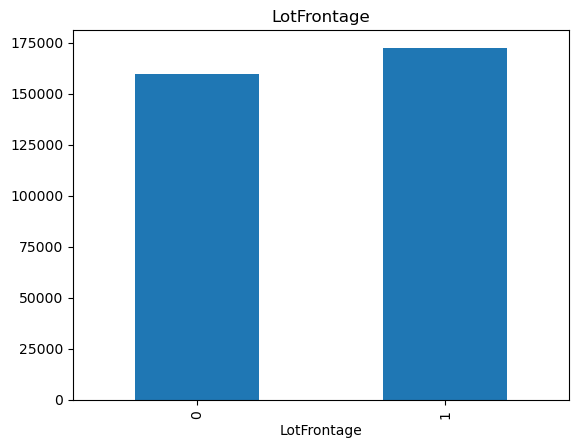

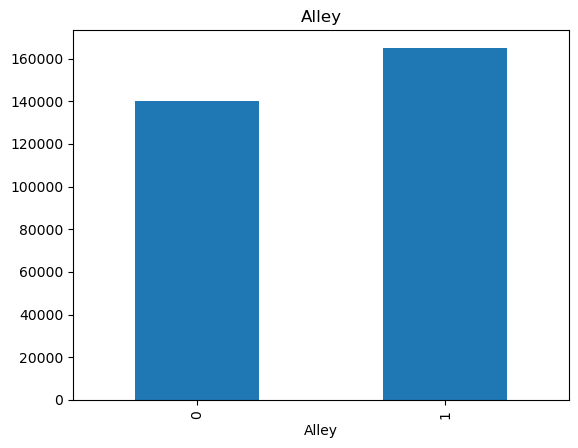

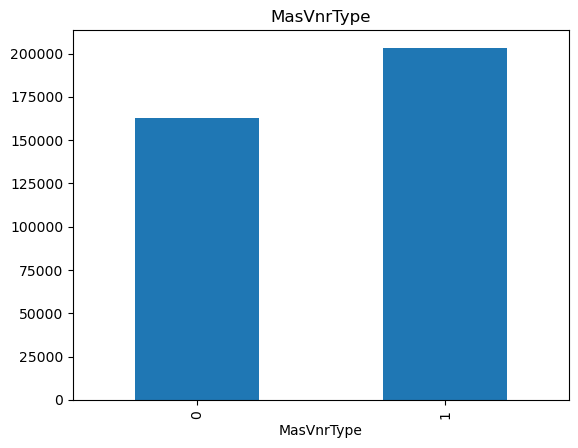

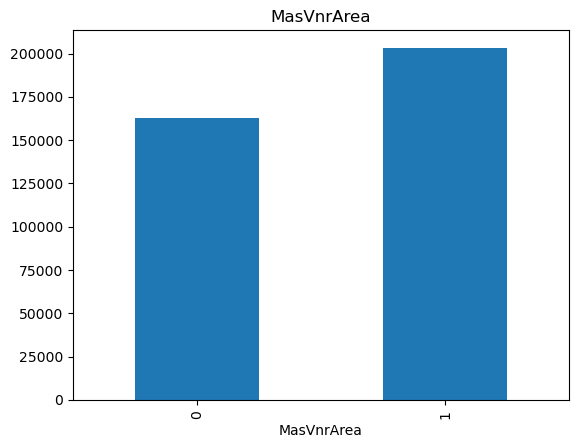

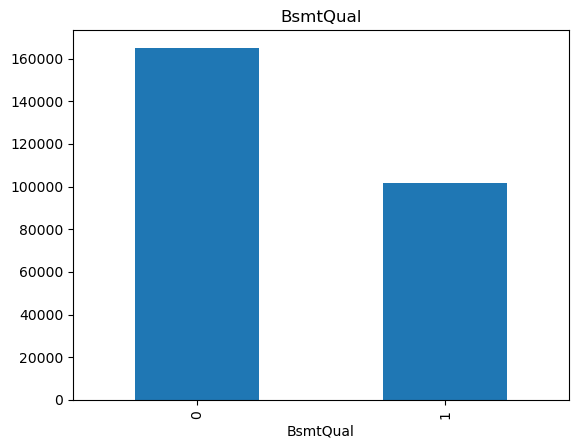

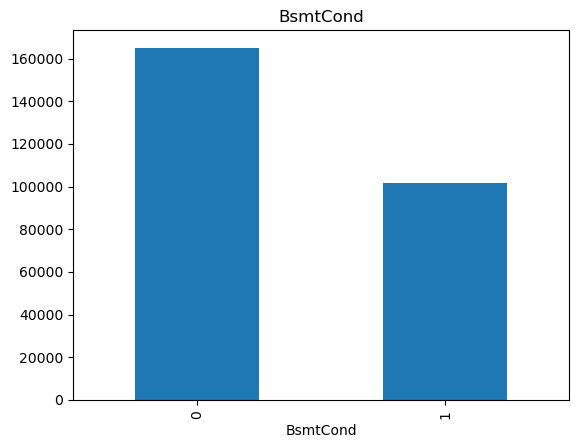

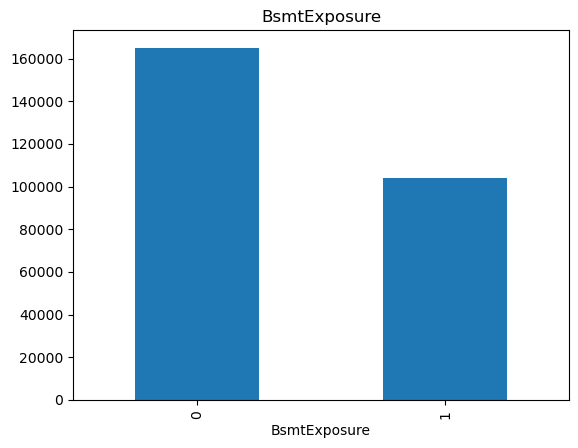

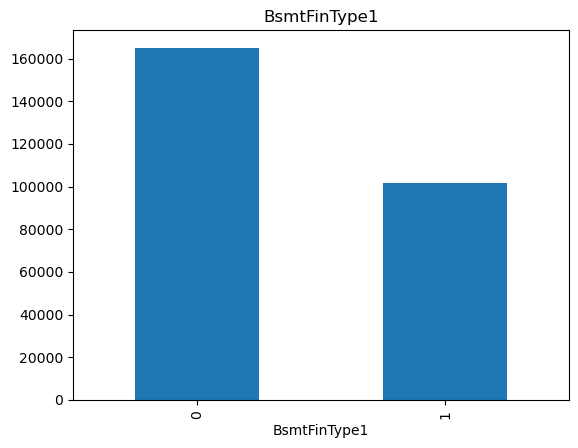

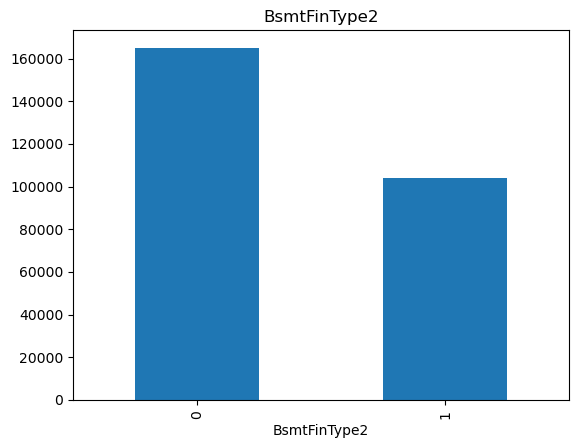

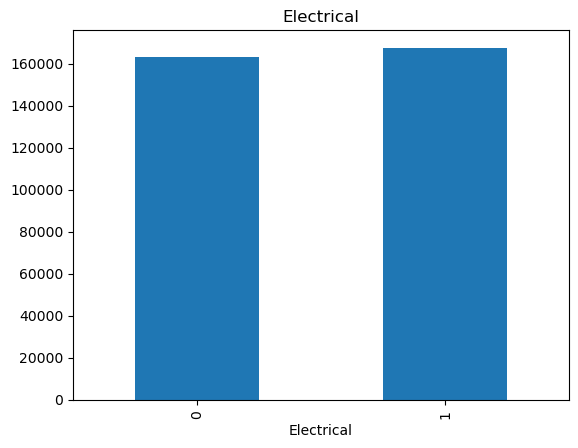

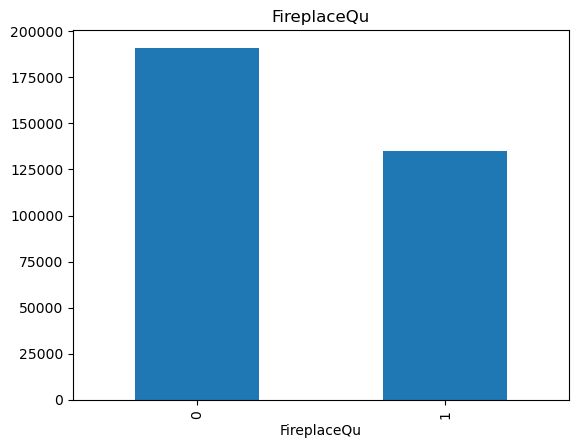

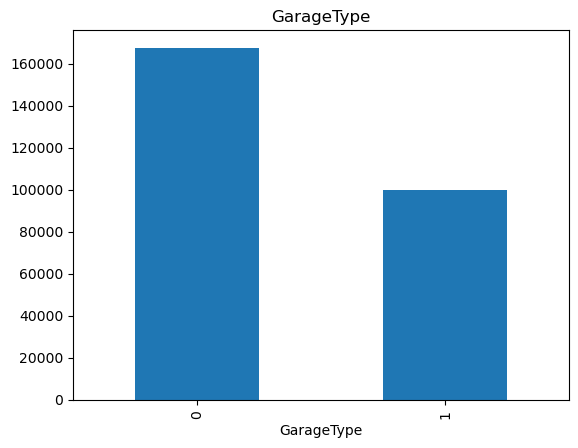

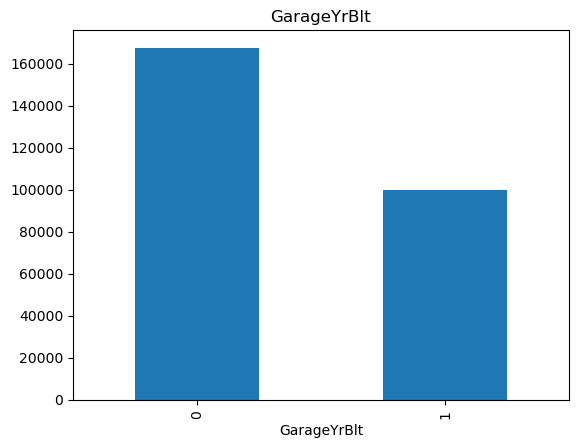

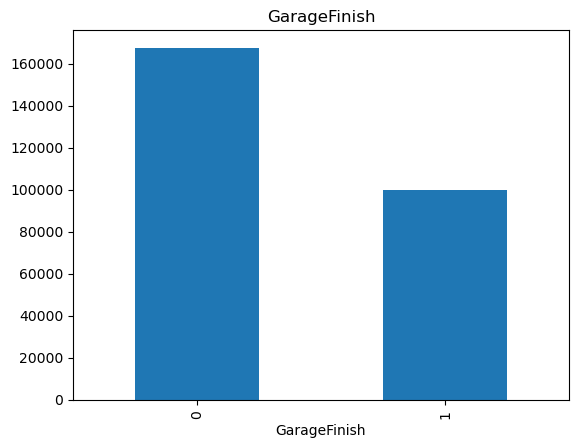

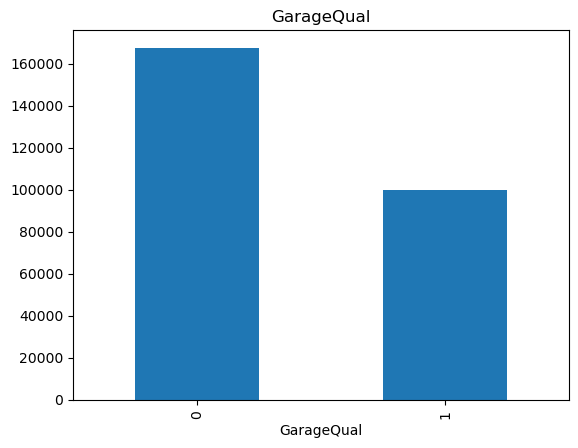

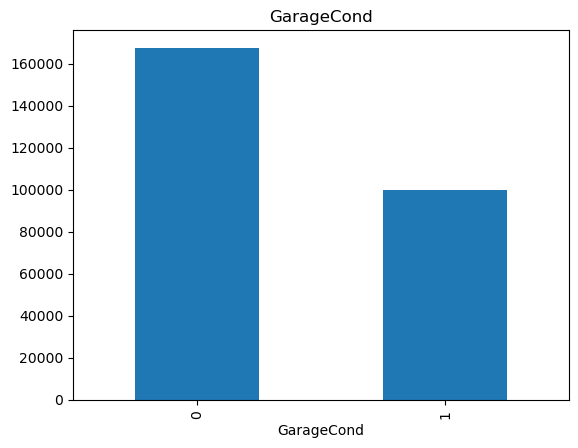

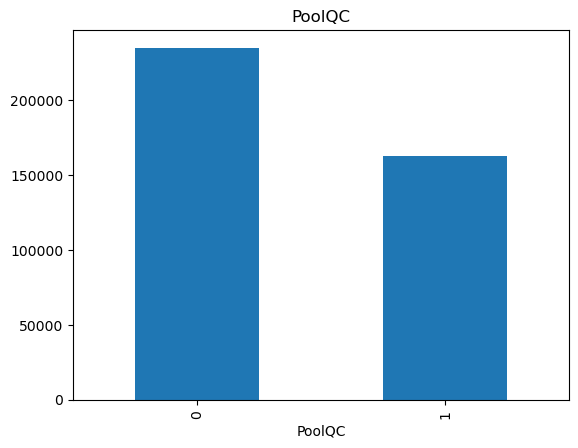

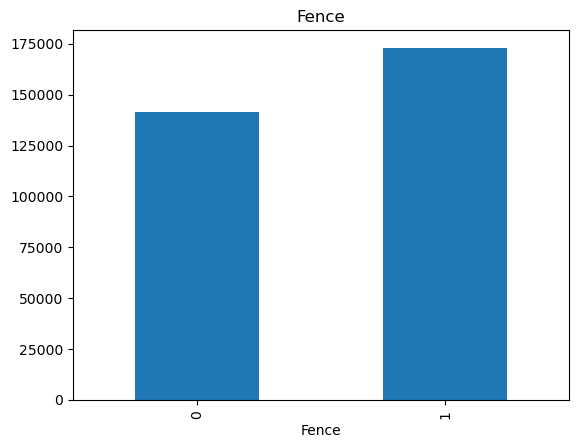

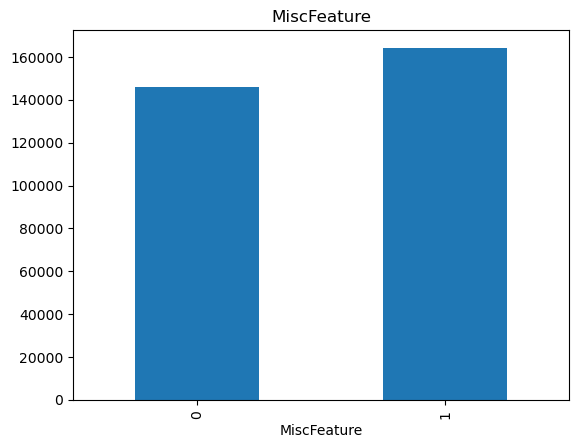

In [9]:
for feature in feature_with_na:
    data=dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature]=np.where(data[feature].isnull(),1,0)  
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
        

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful.

## Numerical Variables

In [10]:
# list of numerical variables
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!= 'O' ]
print("Number of numerical features=",len(numerical_features))
dataset[numerical_features].head()

Number of numerical features= 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days.

In [11]:
# list of variables that contain year information
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
              
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
# list of variables that contain year information
for feature in year_feature:
    print(feature ,'\n',dataset[feature].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

Text(0.5, 1.0, 'House Price vs YearSold')

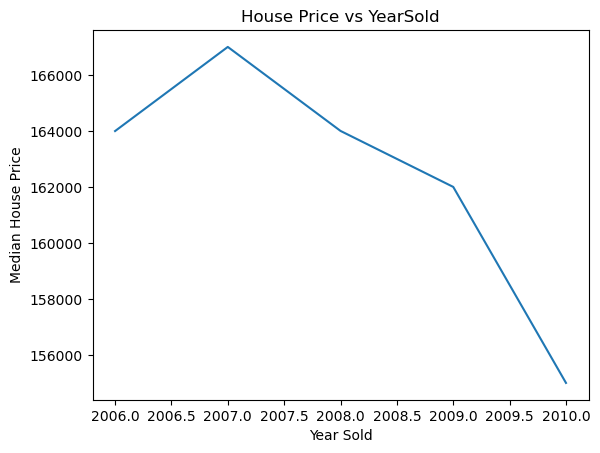

In [13]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

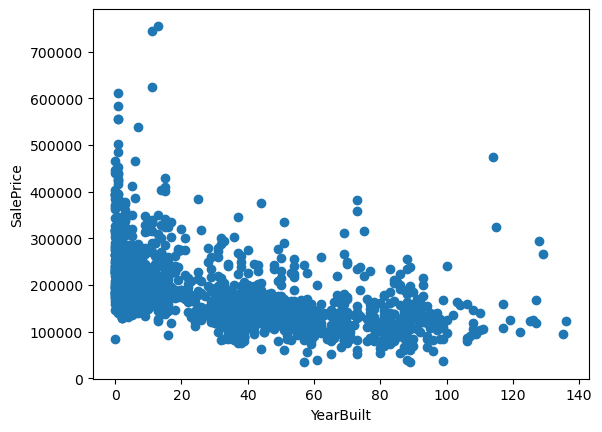

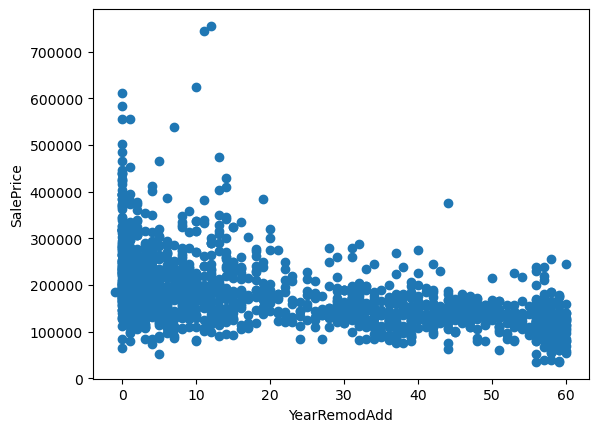

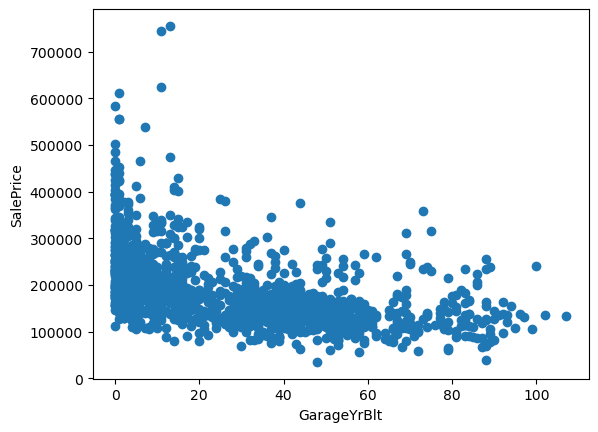

In [14]:
## Here we will compare the difference between All years feature with SalePrice
for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


### Discrete Variables

In [15]:
## Numerical variables are usually of 2 type
## Continous variable and Discrete Variables
# Discrete features
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print('Discrete Variables Count : {}'.format(len(discrete_features)))

Discrete Variables Count : 17


In [16]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [17]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


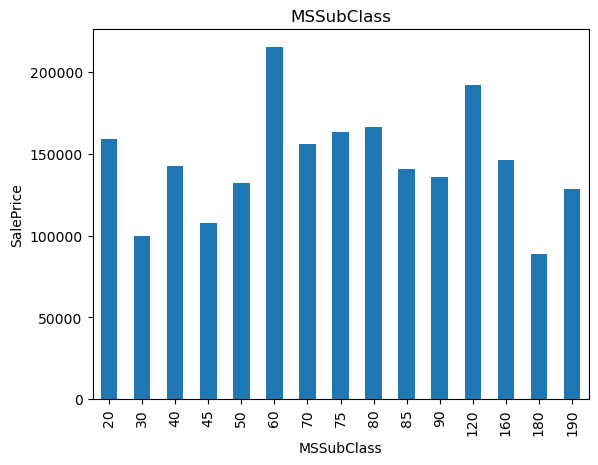

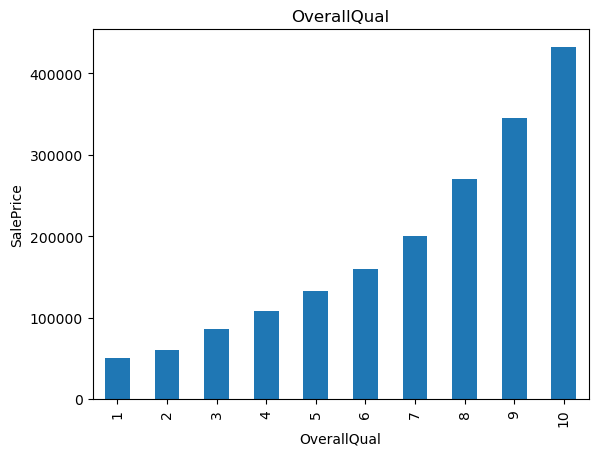

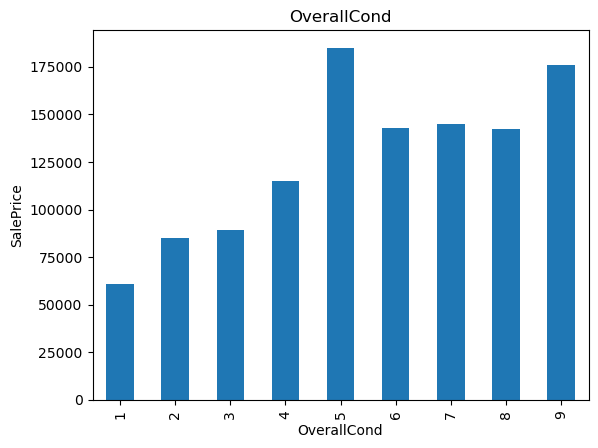

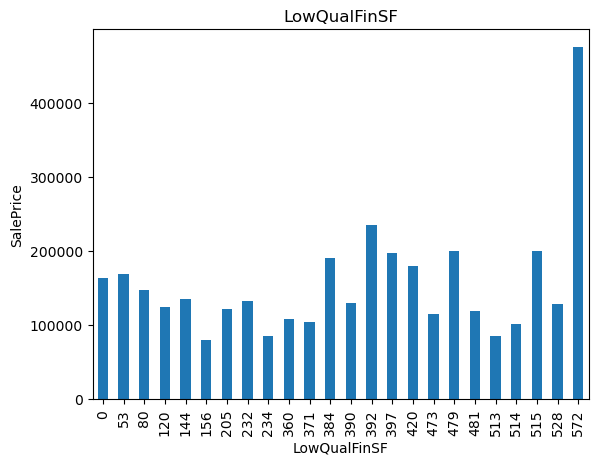

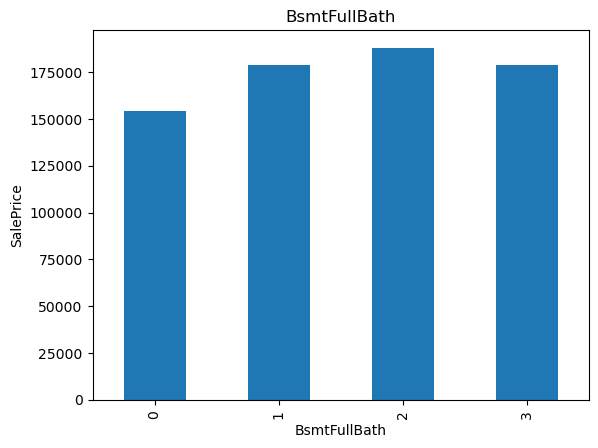

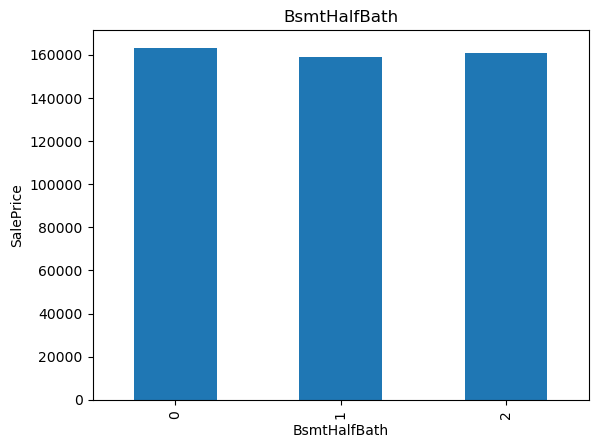

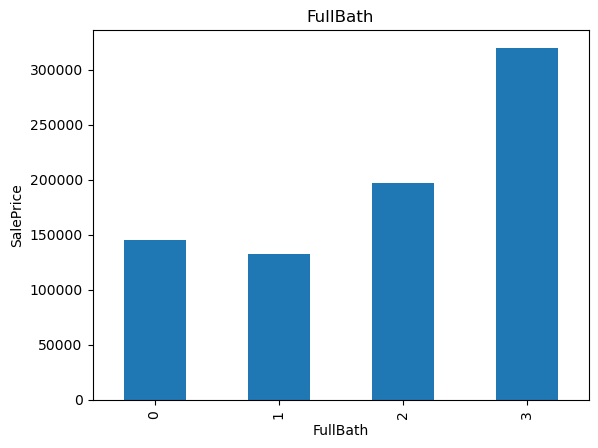

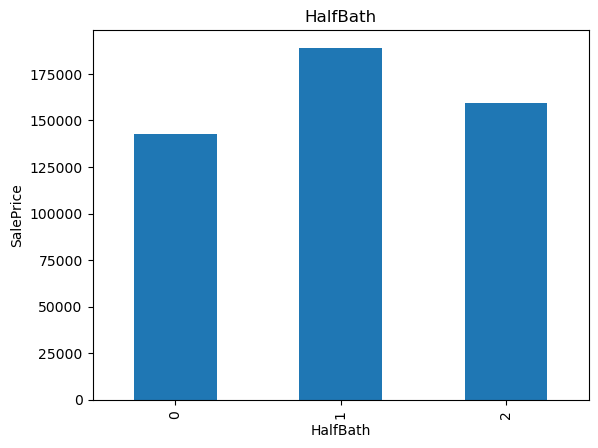

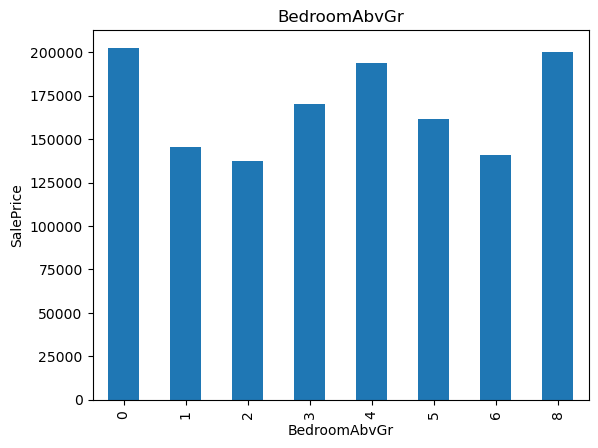

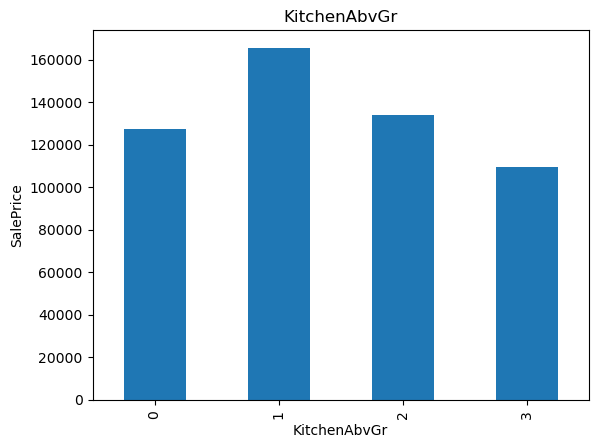

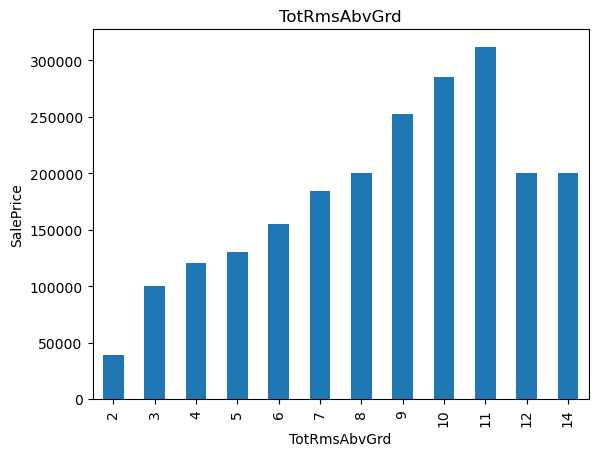

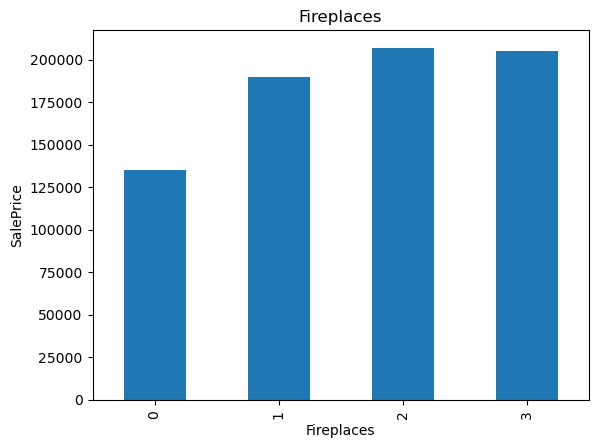

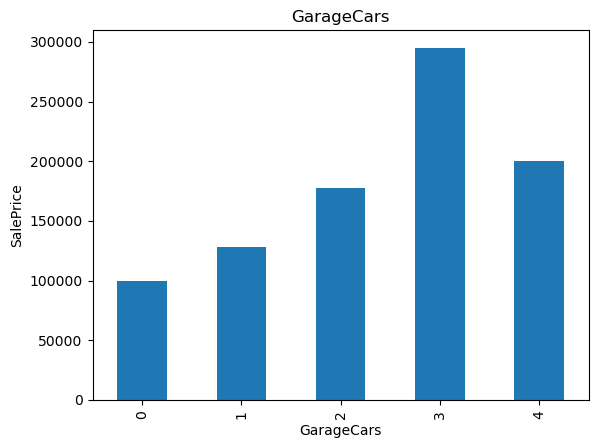

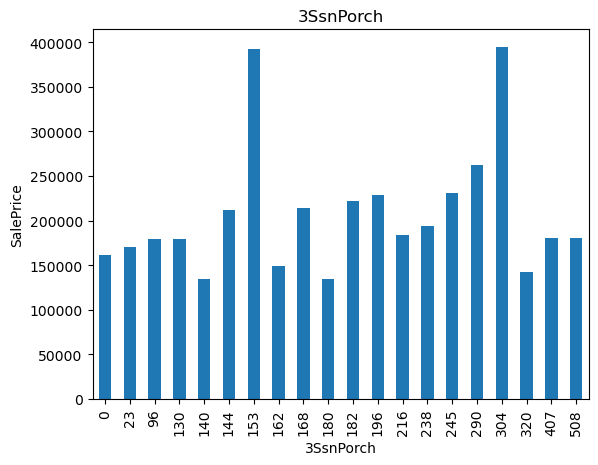

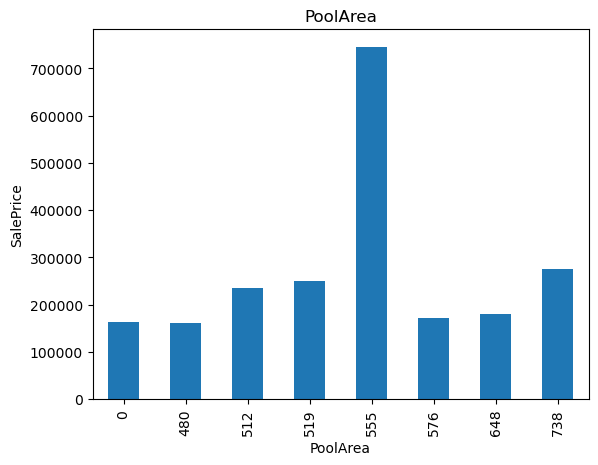

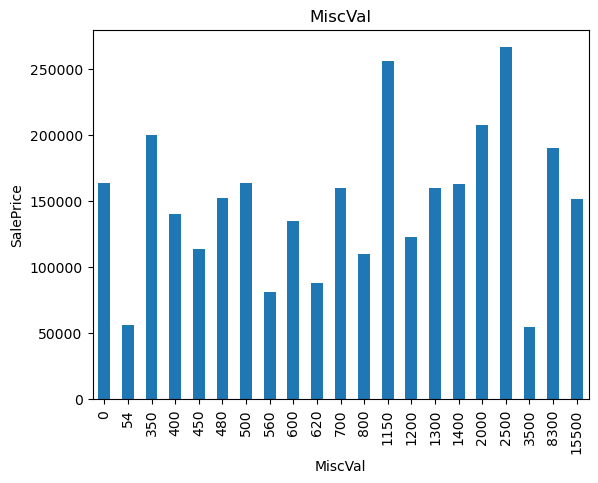

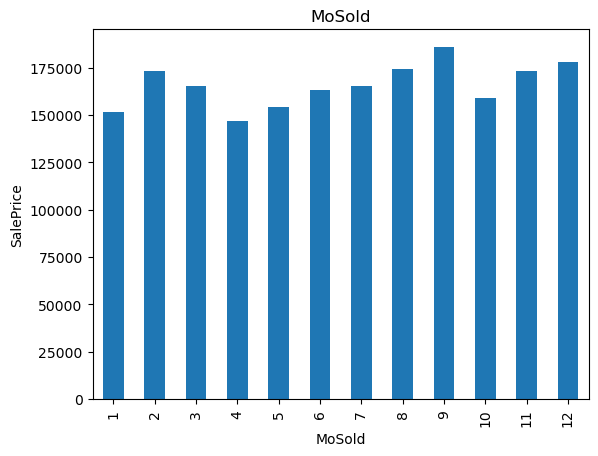

In [18]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Continuous Variable

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]
print('Continous feature count {}'.format(len(continuous_feature)))

Continous feature count 16


In [20]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

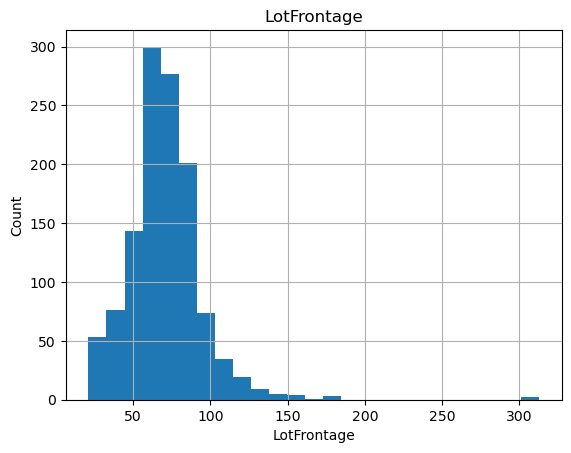

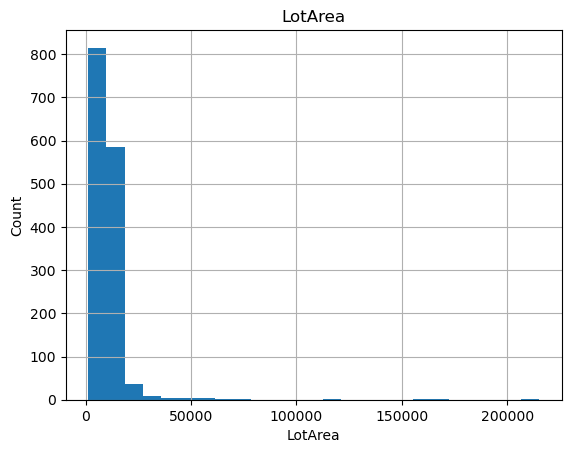

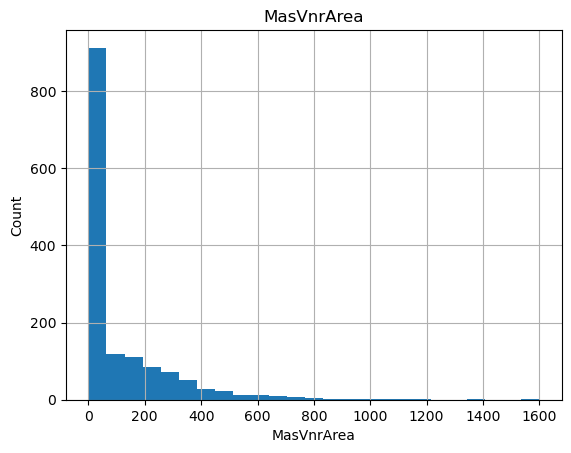

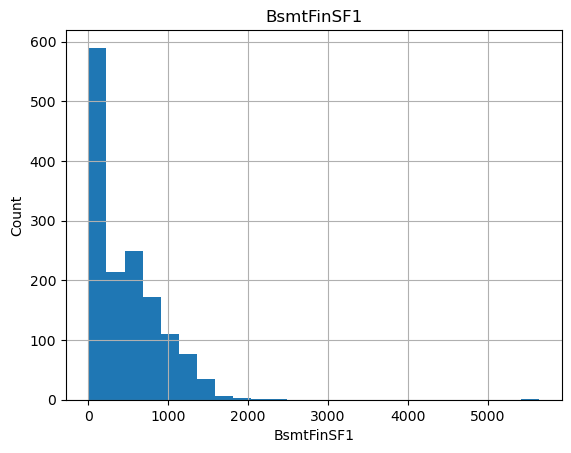

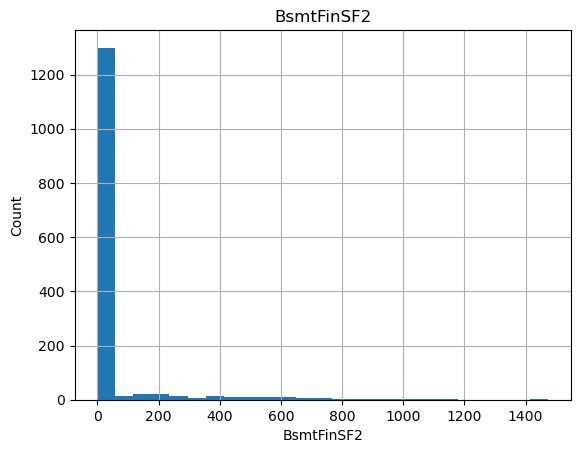

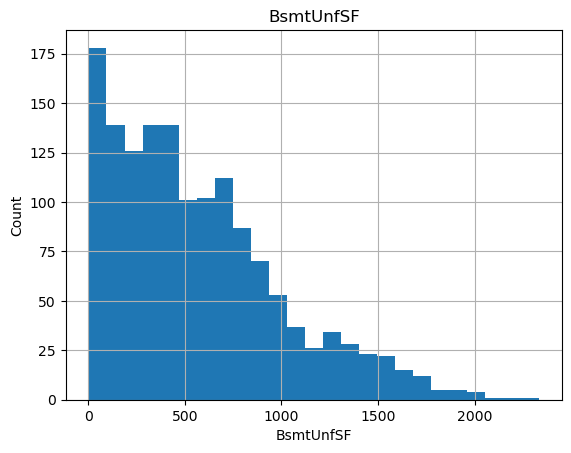

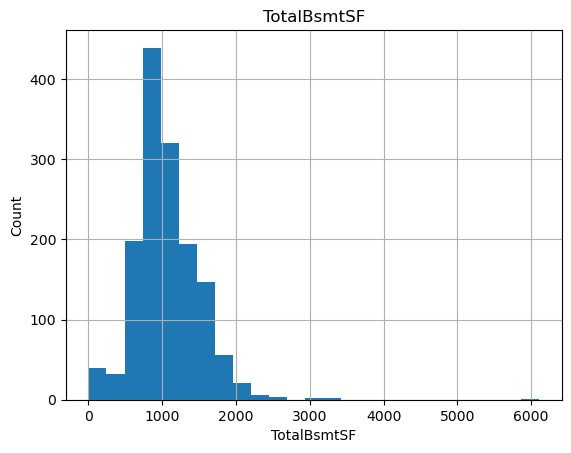

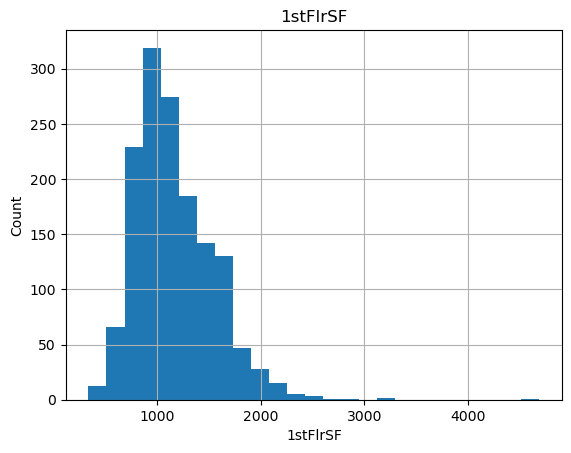

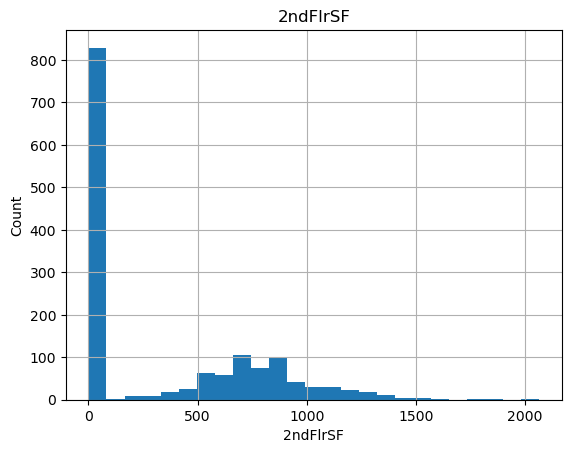

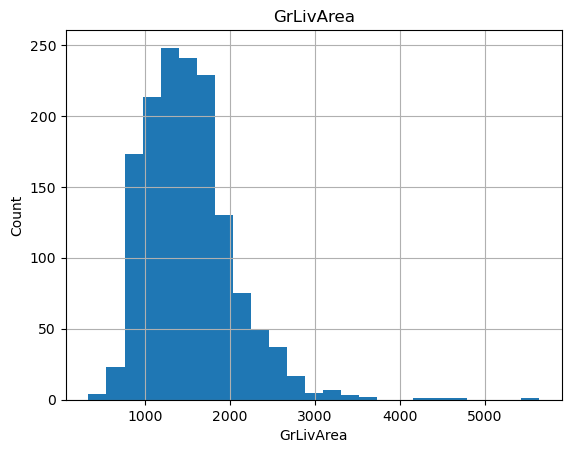

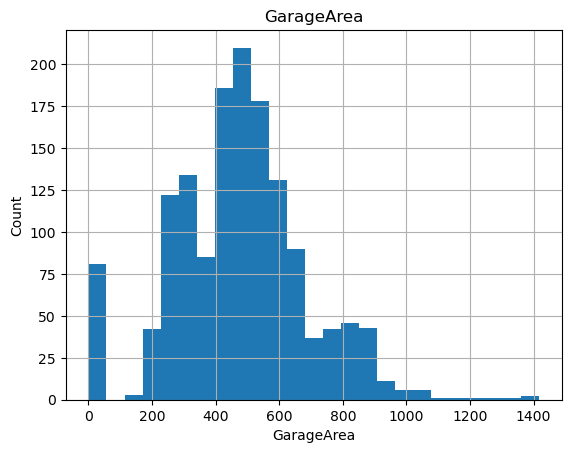

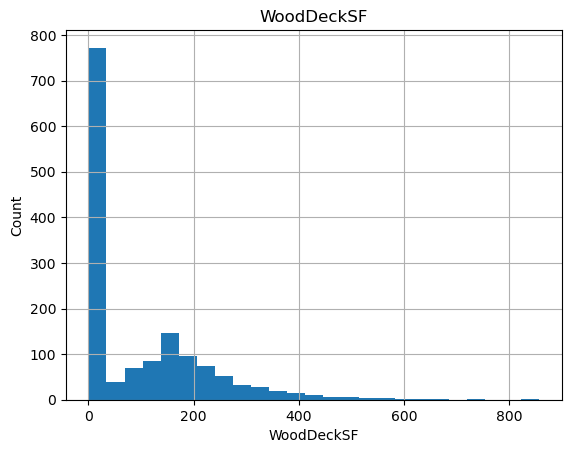

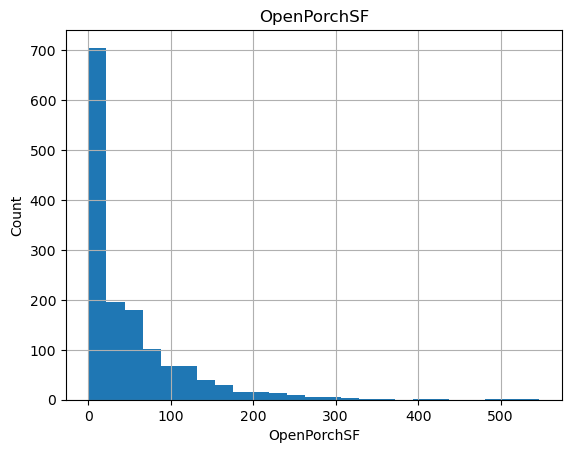

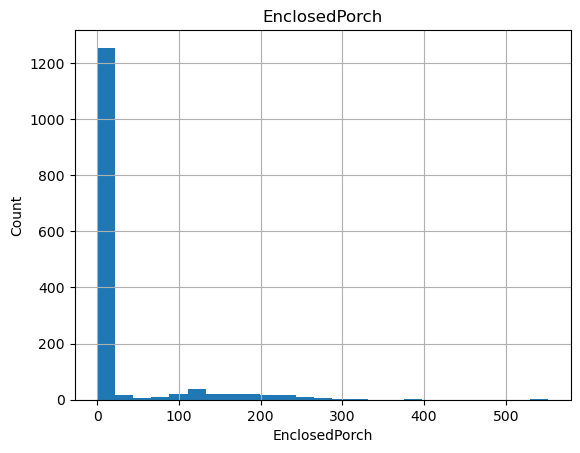

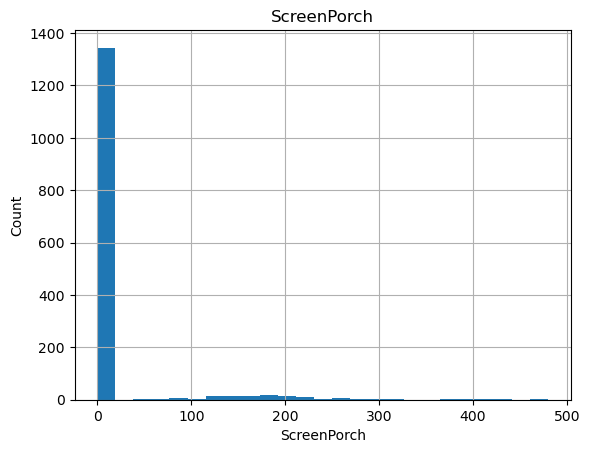

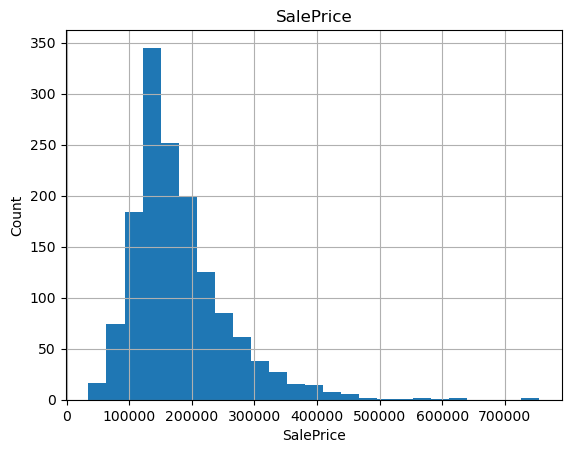

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Here some of the distribution are following Gaussian Distribution but mostly features are showing skewed. So, we need to transform data into normal/gaussian distribution.

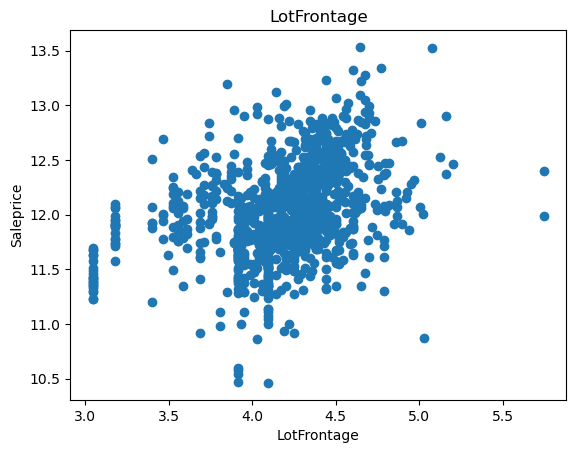

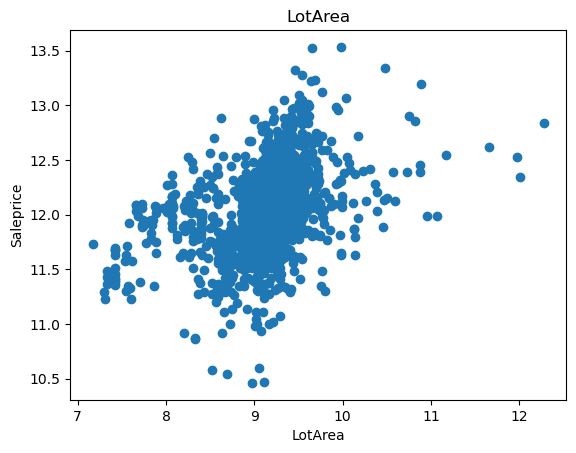

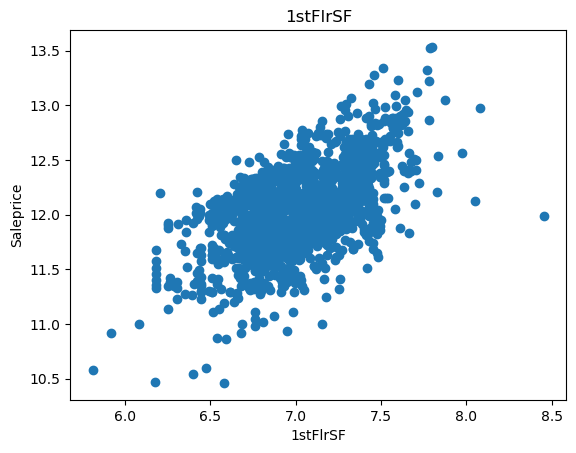

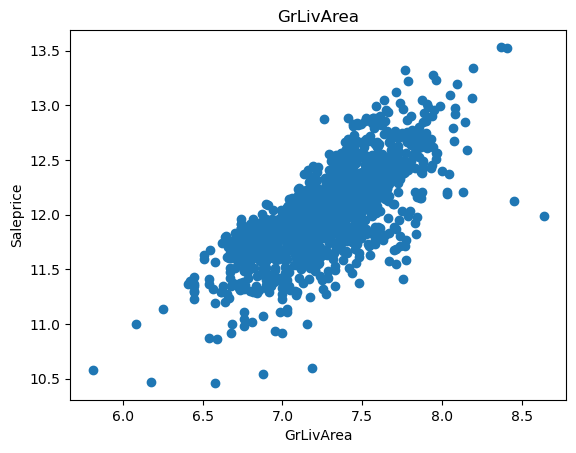

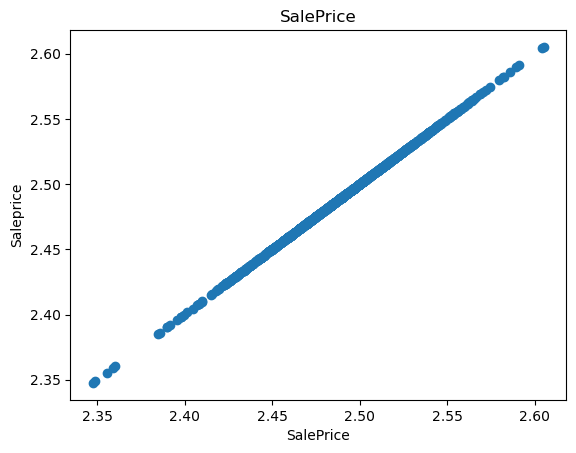

In [22]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.title(feature)
        plt.show()

### Outliers

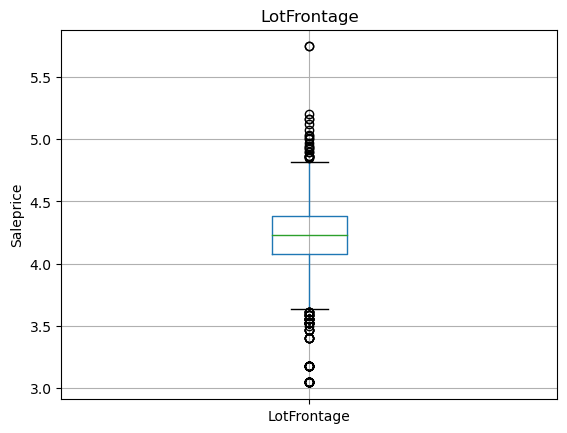

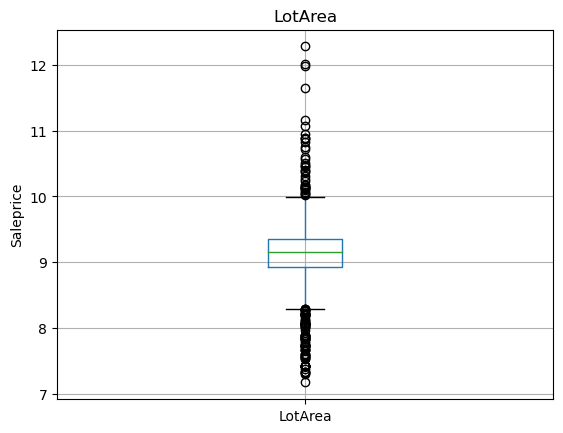

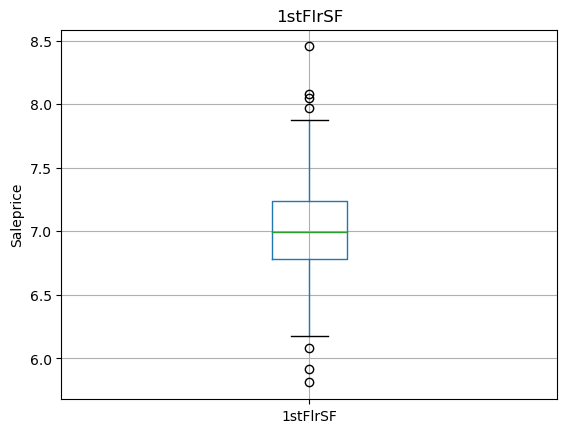

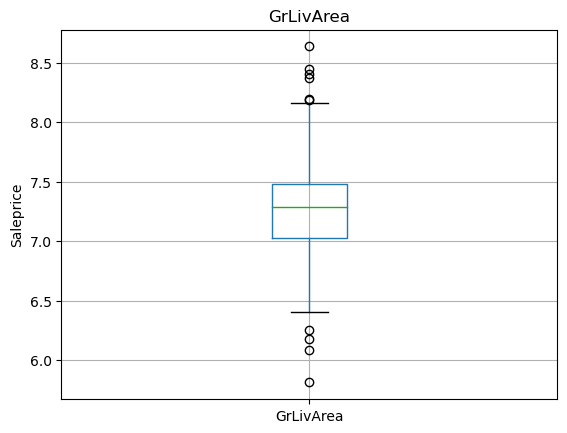

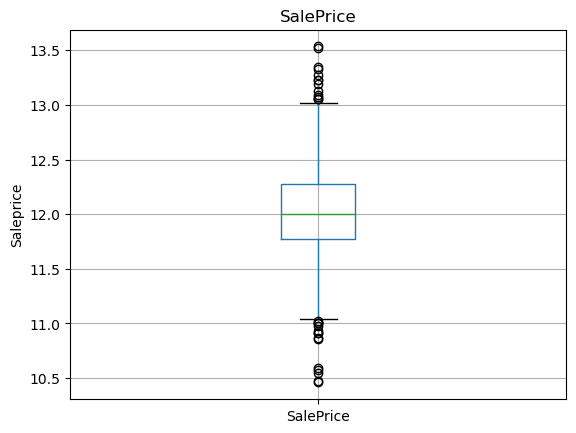

In [23]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel('Saleprice')
        plt.title(feature)
        plt.show()

### Categorical Variables

In [24]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Categorical Feature count : ',len(categorical_features))
categorical_features

Categorical Feature count :  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for feature in categorical_features:
    print('The feature is {} and numbers of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and numbers of categories are 5
The feature is Street and numbers of categories are 2
The feature is Alley and numbers of categories are 3
The feature is LotShape and numbers of categories are 4
The feature is LandContour and numbers of categories are 4
The feature is Utilities and numbers of categories are 2
The feature is LotConfig and numbers of categories are 5
The feature is LandSlope and numbers of categories are 3
The feature is Neighborhood and numbers of categories are 25
The feature is Condition1 and numbers of categories are 9
The feature is Condition2 and numbers of categories are 8
The feature is BldgType and numbers of categories are 5
The feature is HouseStyle and numbers of categories are 8
The feature is RoofStyle and numbers of categories are 6
The feature is RoofMatl and numbers of categories are 8
The feature is Exterior1st and numbers of categories are 15
The feature is Exterior2nd and numbers of categories are 16
The feature is MasVnrType a

###### Find out the relationship between categorical variable and dependent feature SalesPrice

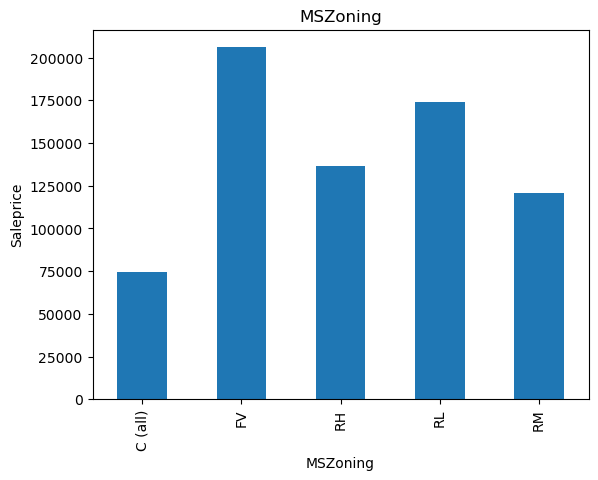

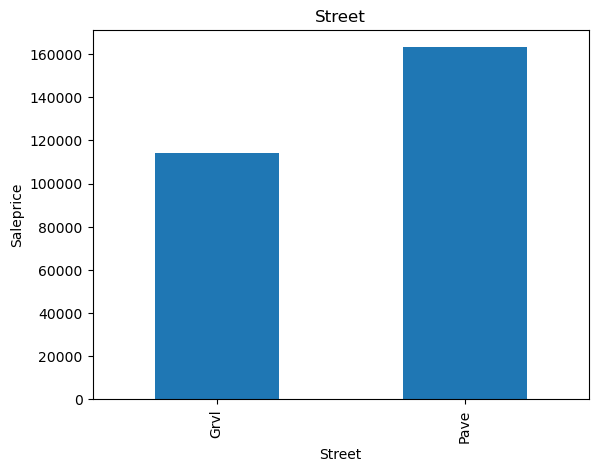

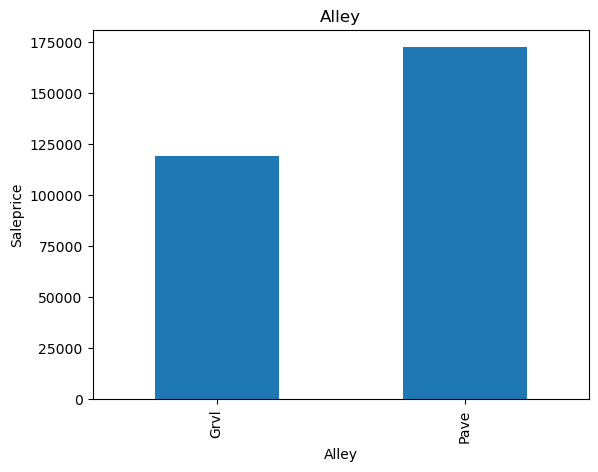

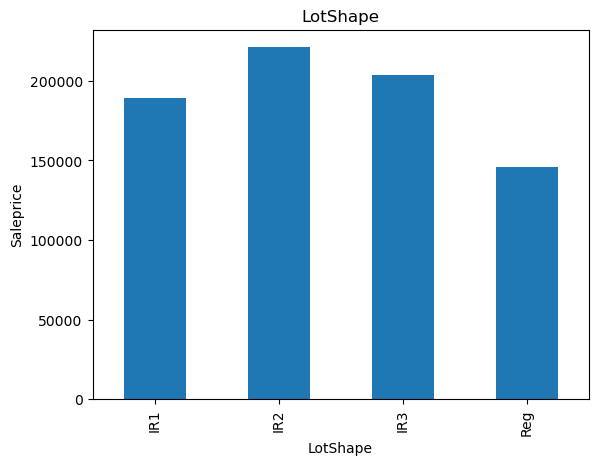

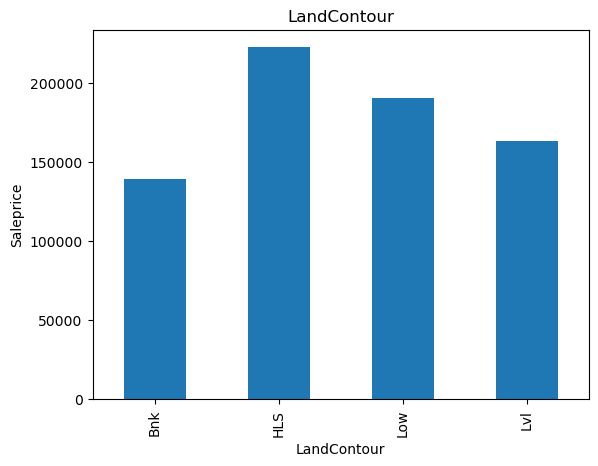

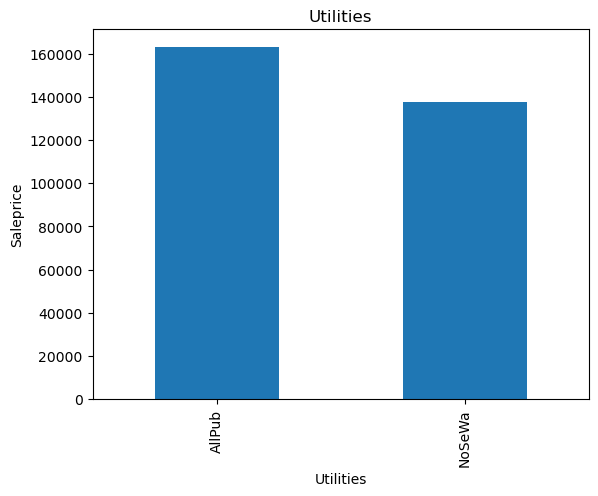

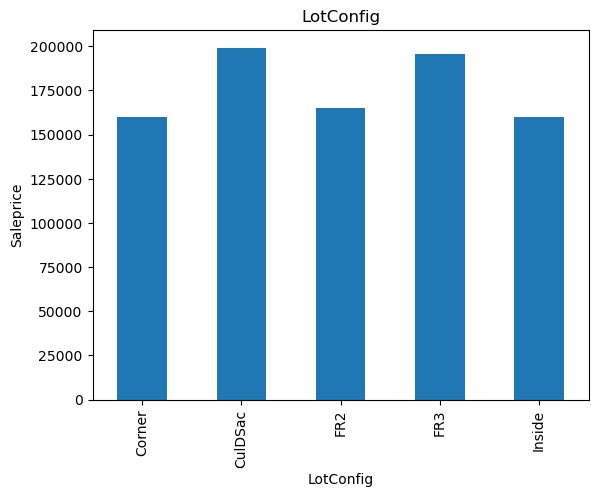

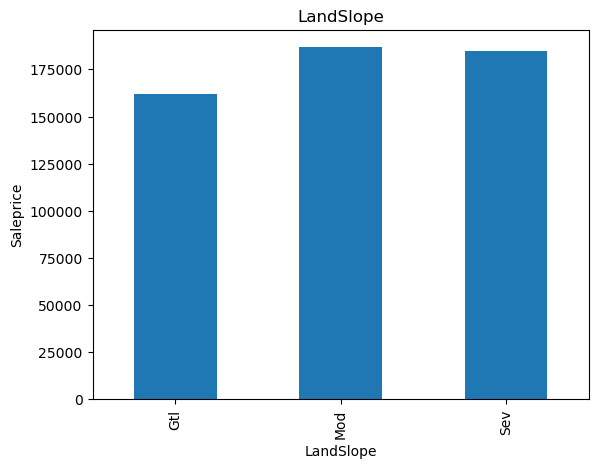

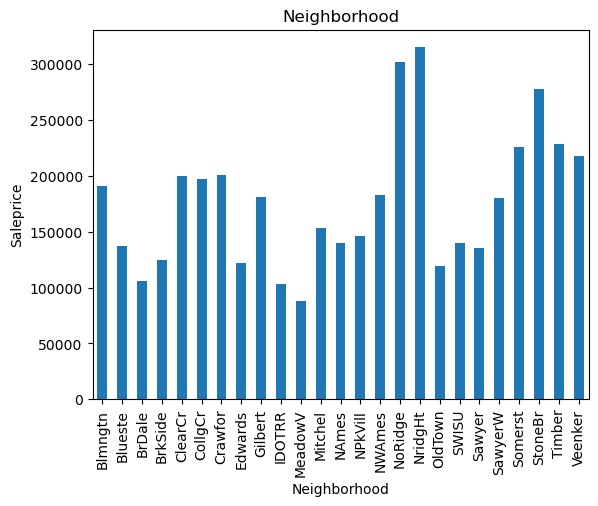

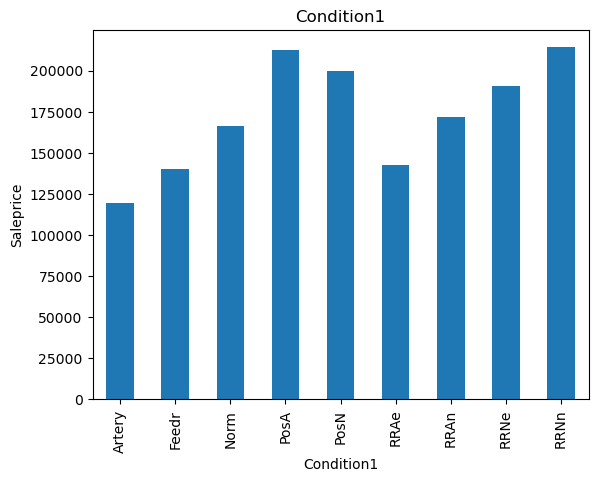

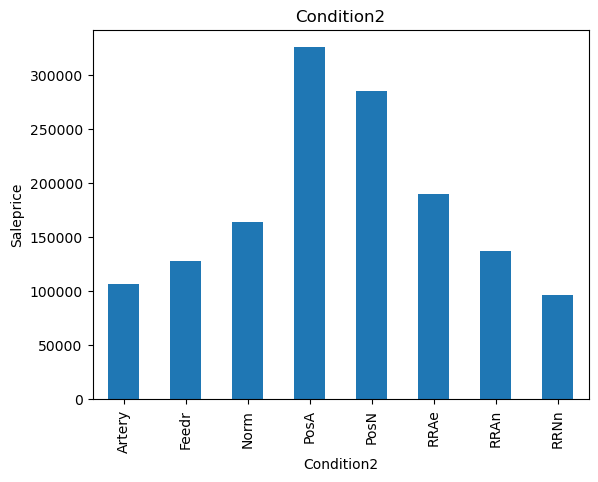

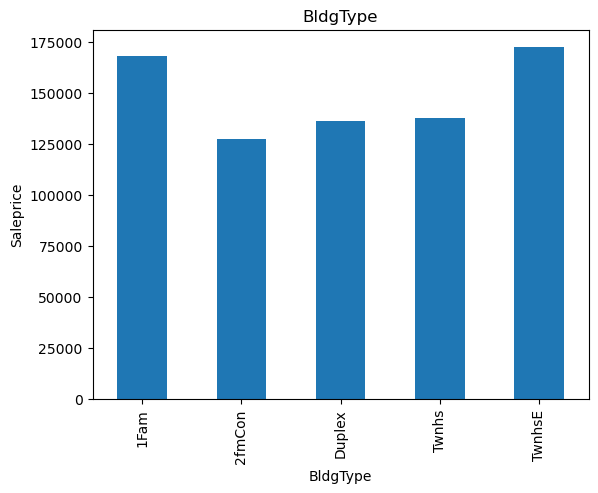

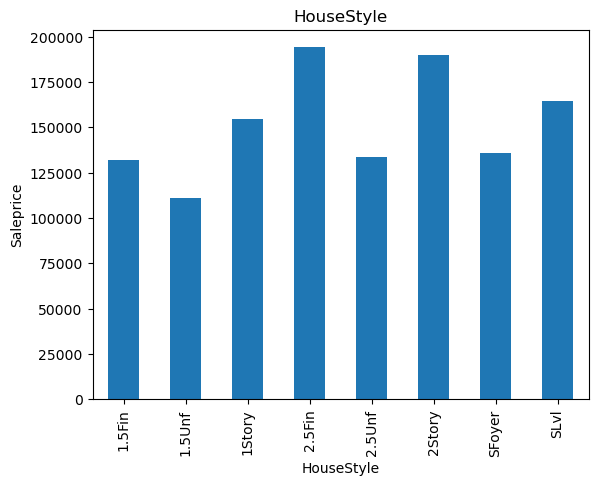

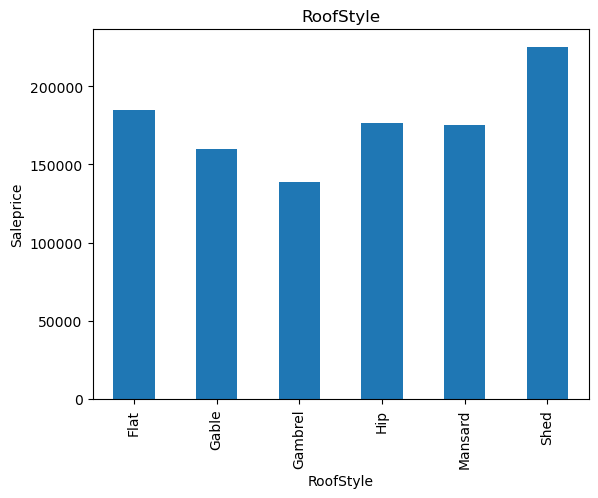

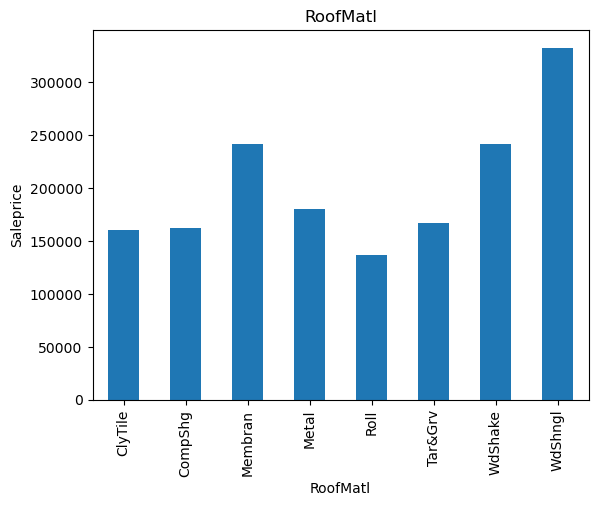

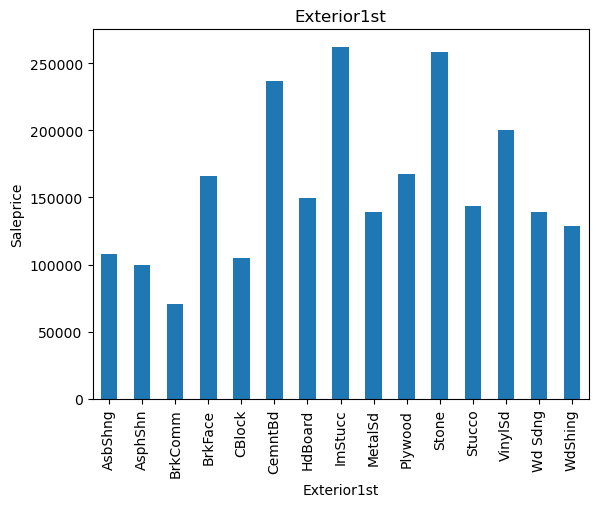

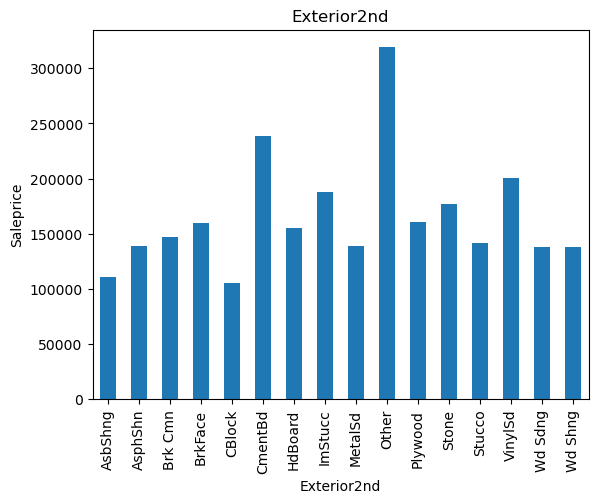

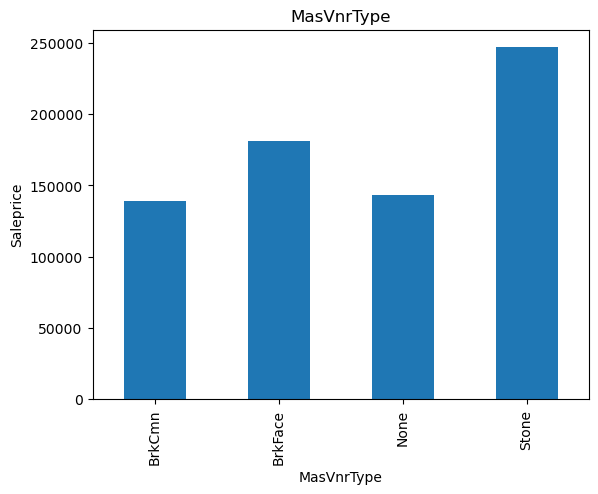

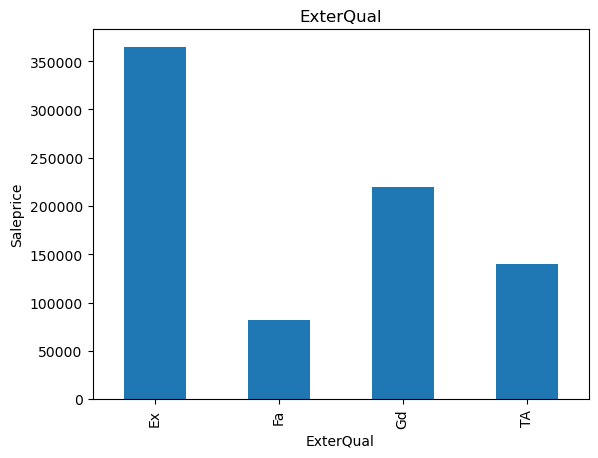

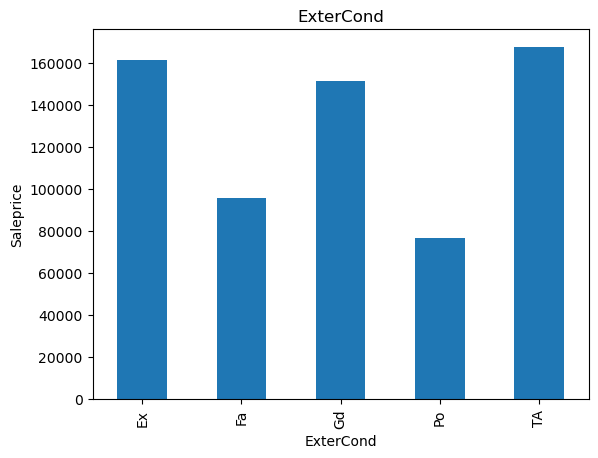

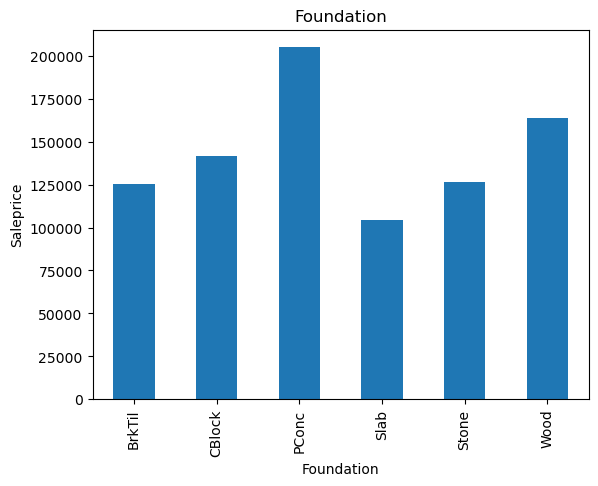

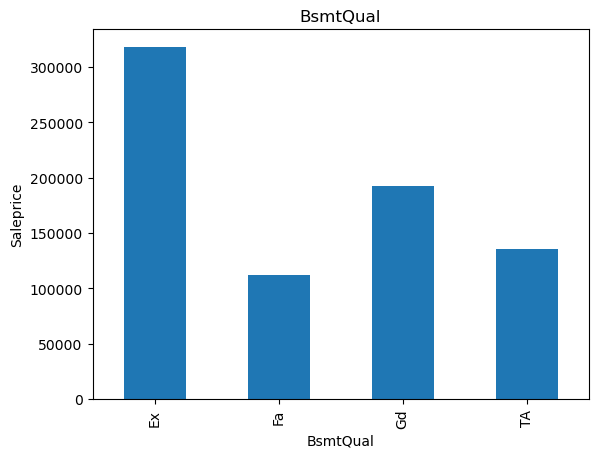

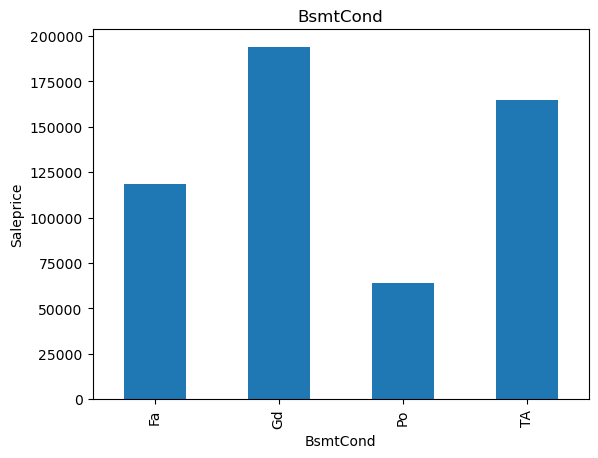

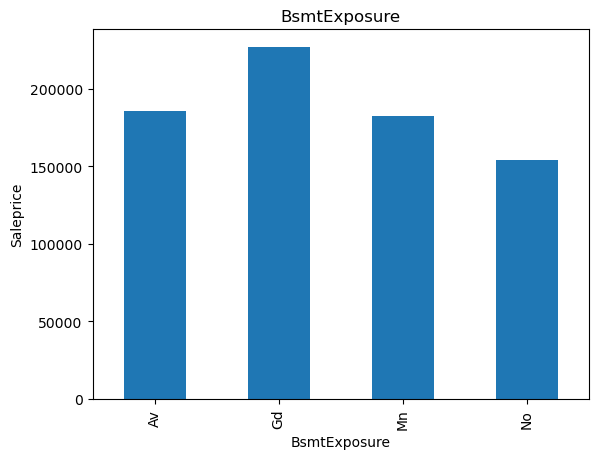

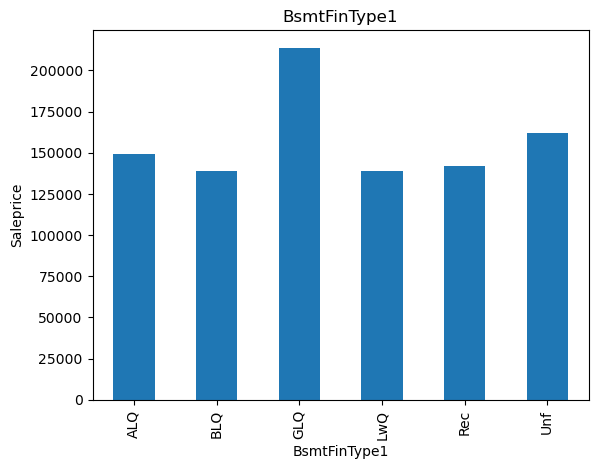

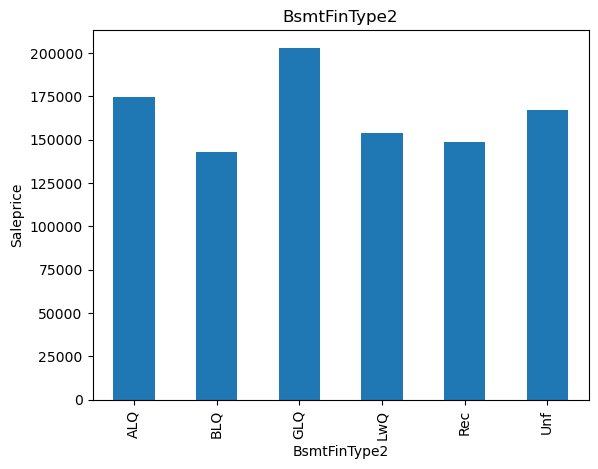

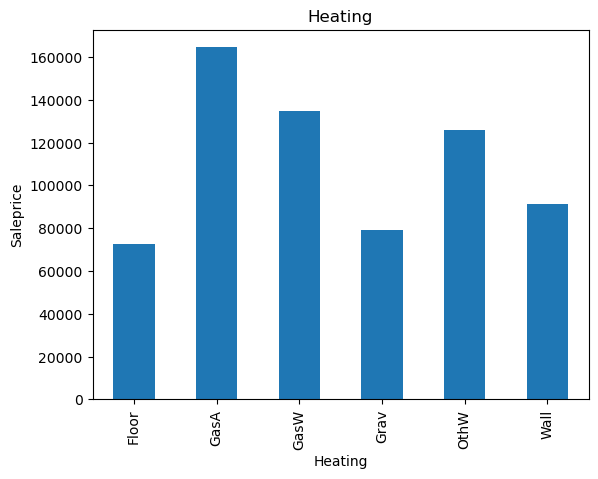

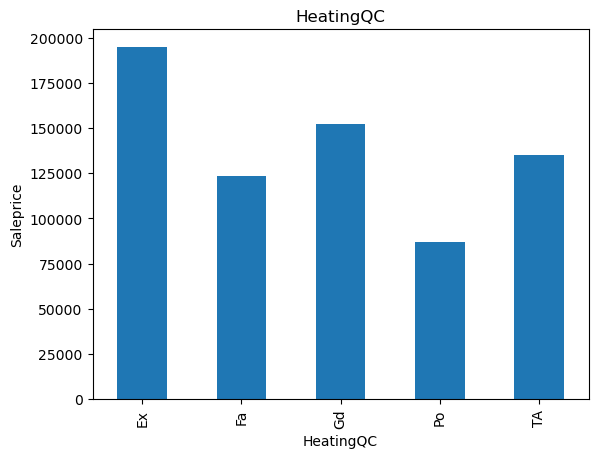

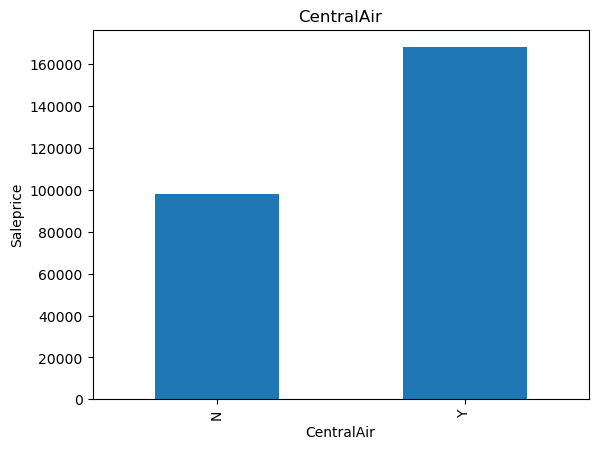

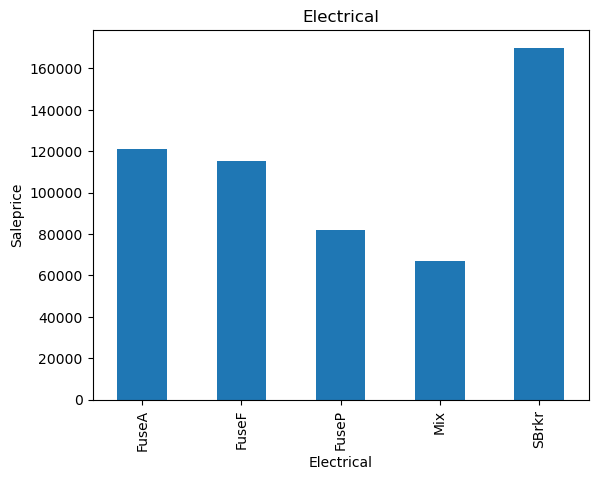

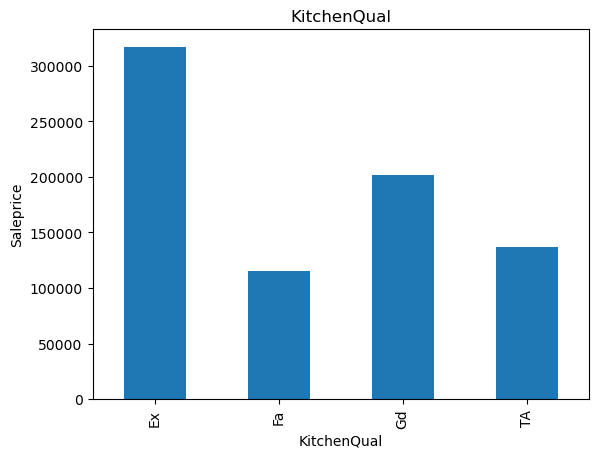

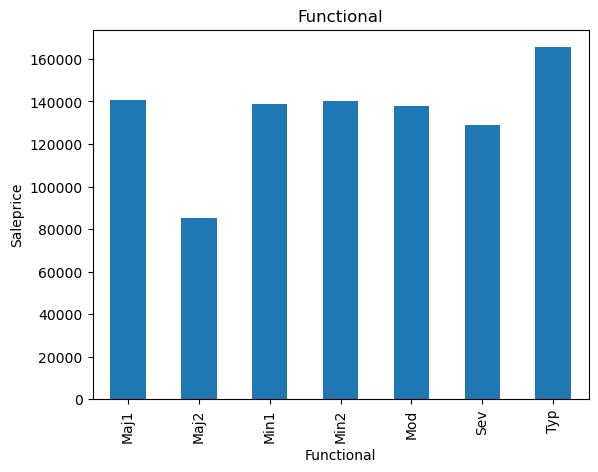

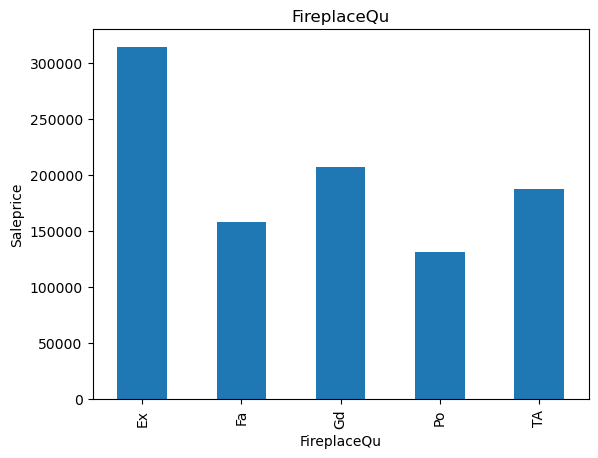

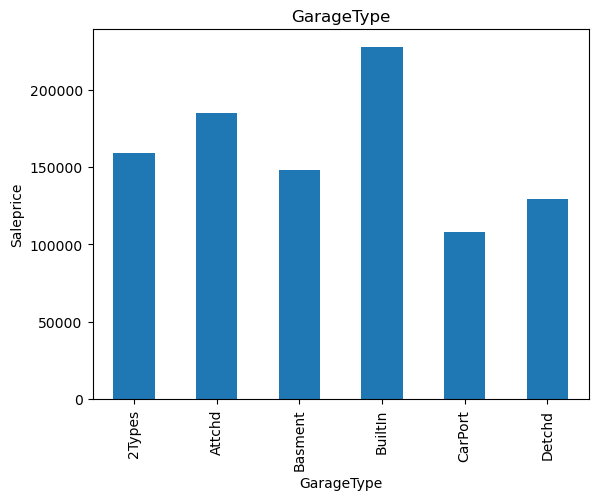

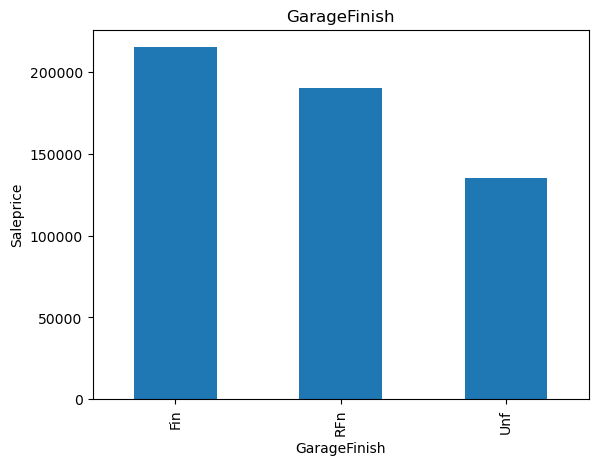

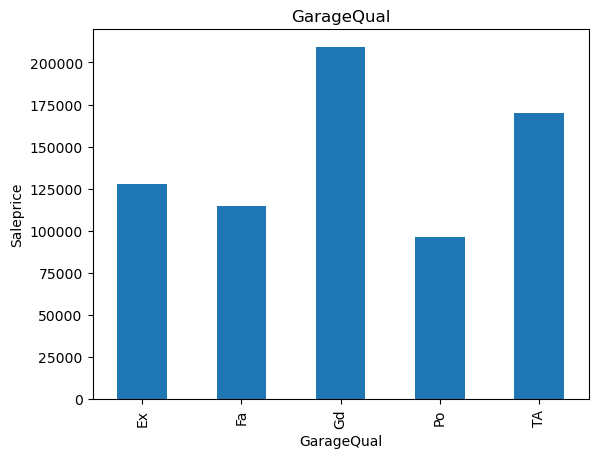

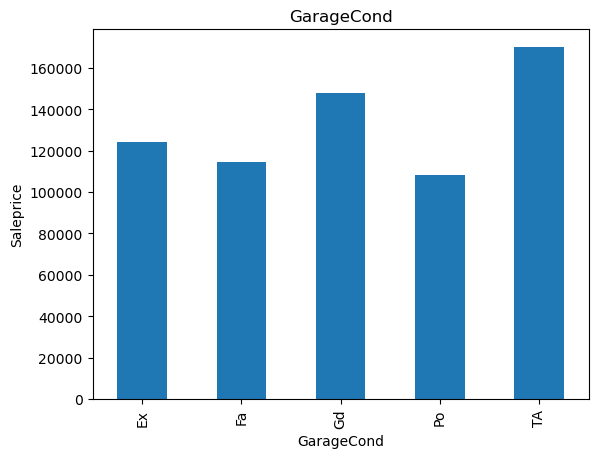

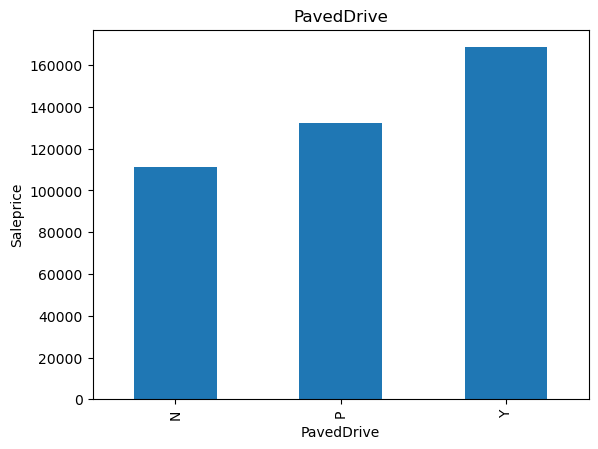

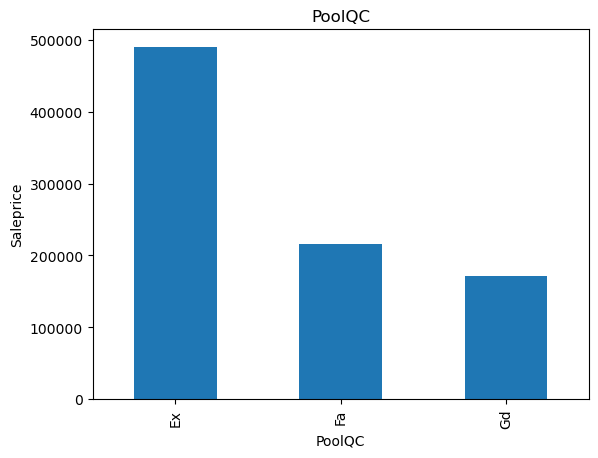

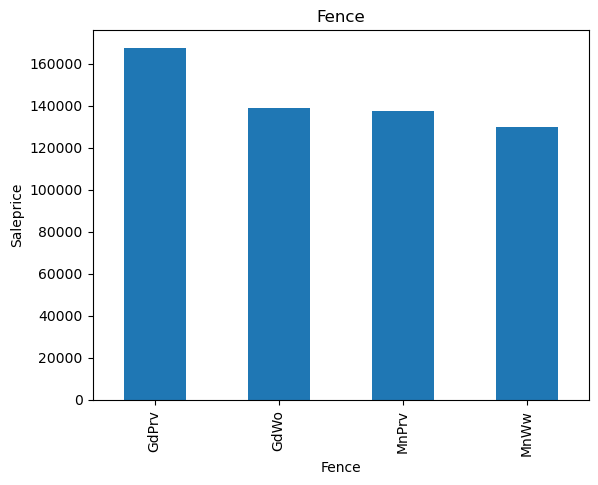

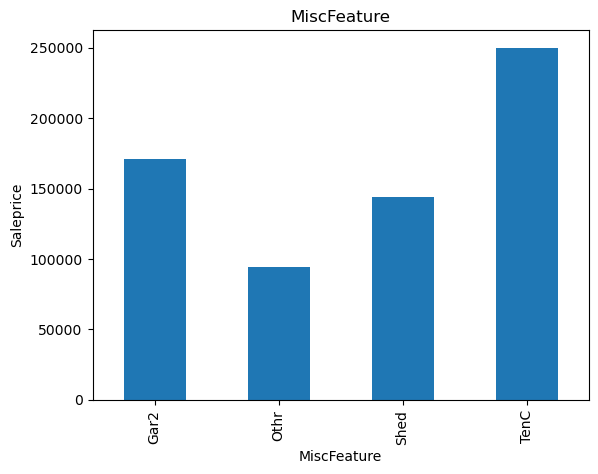

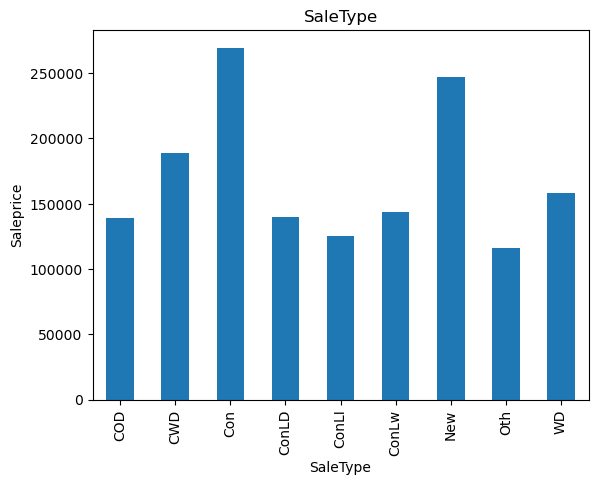

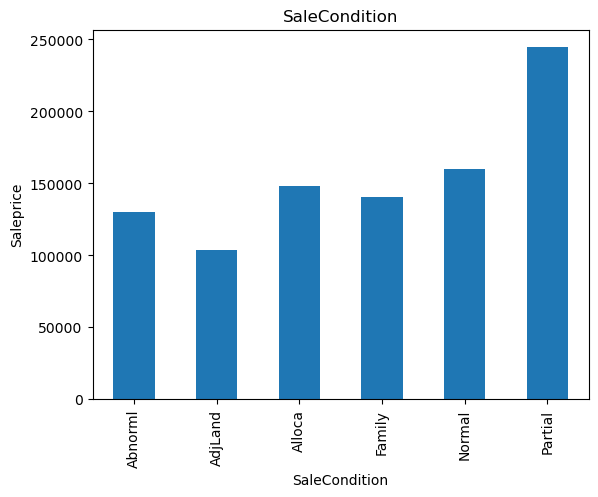

In [27]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.title(feature)
    plt.show()

## Feature Engineering

### Missing Values

In [28]:
## Let us capture all the nan values
##First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']
print(len(features_nan))
for feature in features_nan:
    print('{}: {}% of missing values'.format(feature,np.round(dataset[feature].isnull().mean() *100,2)))

16
Alley: 93.77% of missing values
MasVnrType: 0.55% of missing values
BsmtQual: 2.53% of missing values
BsmtCond: 2.53% of missing values
BsmtExposure: 2.6% of missing values
BsmtFinType1: 2.53% of missing values
BsmtFinType2: 2.6% of missing values
Electrical: 0.07% of missing values
FireplaceQu: 47.26% of missing values
GarageType: 5.55% of missing values
GarageFinish: 5.55% of missing values
GarageQual: 5.55% of missing values
GarageCond: 5.55% of missing values
PoolQC: 99.52% of missing values
Fence: 80.75% of missing values
MiscFeature: 96.3% of missing values


In [29]:
## Replace missing value with a new label "Missing"
def replace_cat_feature(dataset, features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)
dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [31]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean()*100,2)))

LotFrontage: 17.74% missing value
MasVnrArea: 0.55% missing value
GarageYrBlt: 5.55% missing value


In [32]:
## Replacing the numerical Missing Values
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'_nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [33]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,

In [34]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [35]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [36]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


### Numerical Variables

As we have seen that the numerical variables are skewed we will perform log normal distribution to transform skewed data into Normal\Gaussian data.

In [37]:
import numpy as np
#These features came from 0 condition in transformation.
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']   

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [38]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


##### Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [39]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [41]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [42]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [43]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


### Feature Scaling

In [44]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [45]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [47]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


## Feature Selection

In [48]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
dataset=data.copy()

In [49]:
## Capture the dependent feature
X=dataset.drop(['Id', 'SalePrice'],axis=1)
y=dataset[['SalePrice']]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [51]:
### Applying Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.
# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
feature_sel_model.get_params()

{'estimator__alpha': 0.005,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': 0,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(alpha=0.005, random_state=0),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

In [53]:
len(X_train.columns[feature_sel_model.get_support()])

22

In [54]:
# Make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('Total Features: {}'.format(X_train.shape[1]))
print('Selected Features: {}'.format(len(selected_feat)))

Total Features: 82
Selected Features: 22


In [55]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

In [56]:
X_train=X_train[selected_feat]

In [57]:
X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
930,0.000000,0.75,0.863636,0.777778,0.50,0.049180,0.0,0.75,0.75,1.00,1.0,0.559760,0.523250,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0,0.75
656,0.000000,0.75,0.363636,0.444444,0.75,0.049180,0.0,0.50,0.25,1.00,1.0,0.434539,0.406196,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0,0.75
45,0.588235,0.75,0.954545,0.888889,0.50,0.098361,1.0,1.00,0.25,1.00,1.0,0.627205,0.586296,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75
1348,0.000000,0.75,0.454545,0.666667,0.50,0.163934,0.0,0.75,1.00,1.00,1.0,0.566920,0.529943,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.75
55,0.000000,0.75,0.363636,0.555556,0.50,0.737705,0.0,0.50,0.25,0.75,1.0,0.549026,0.513216,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75


In [58]:
y_train.head()

,SalePrice
930,12.211060
656,11.887931
45,12.675764
1348,12.278393
55,12.103486


In [59]:
X_test=X_test[selected_feat]

In [60]:
X_test.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
529,0.000000,0.75,0.727273,0.555556,0.250,0.540984,1.0,0.50,0.25,0.5,1.0,0.764014,0.714182,0.333333,0.333333,0.666667,0.6,0.8,0.666667,0.50,1.0,0.25
491,0.176471,0.75,0.363636,0.555556,0.750,0.934426,0.0,0.50,0.25,0.5,1.0,0.398758,0.549294,0.333333,0.000000,0.666667,0.6,0.8,0.333333,0.25,1.0,0.75
459,0.176471,0.75,0.136364,0.444444,0.375,0.983607,0.0,0.50,0.25,0.5,1.0,0.406964,0.453307,0.333333,0.666667,0.333333,0.6,0.4,0.333333,0.25,1.0,0.75
279,0.235294,0.75,0.772727,0.666667,0.500,0.524590,1.0,0.75,0.25,1.0,1.0,0.469855,0.636999,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0,0.75
655,0.823529,0.25,0.090909,0.555556,0.500,0.655738,0.0,0.50,0.25,0.5,1.0,0.171149,0.419061,0.000000,0.333333,0.000000,0.2,0.4,0.333333,0.25,1.0,0.50


### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lin_regression=LinearRegression()
lin_regression.fit(X_train,y_train)

LinearRegression()

In [62]:
# Prediction
reg_prediction=lin_regression.predict(X_test)
reg_prediction

array([[12.2669902 ],
       [12.00584276],
       [11.68972788],
       [12.2984148 ],
       [11.4231846 ],
       [11.50019469],
       [12.4432993 ],
       [11.68696077],
       [13.09965892],
       [11.96744878],
       [12.27497929],
       [11.97043307],
       [12.2553517 ],
       [11.68076387],
       [11.74173556],
       [11.8708421 ],
       [12.41297276],
       [11.70391123],
       [11.80268242],
       [12.16227634],
       [11.71085292],
       [11.92299144],
       [11.48287752],
       [12.01107536],
       [12.13313126],
       [12.16006538],
       [12.07601612],
       [11.26277066],
       [12.48689711],
       [11.56736324],
       [11.93611927],
       [12.22081948],
       [11.93719436],
       [12.62410248],
       [12.65912406],
       [12.1182906 ],
       [12.54908431],
       [11.75249301],
       [12.37237221],
       [12.7231209 ],
       [12.33961657],
       [11.8164409 ],
       [12.23260887],
       [12.64179009],
       [12.73639527],
       [11

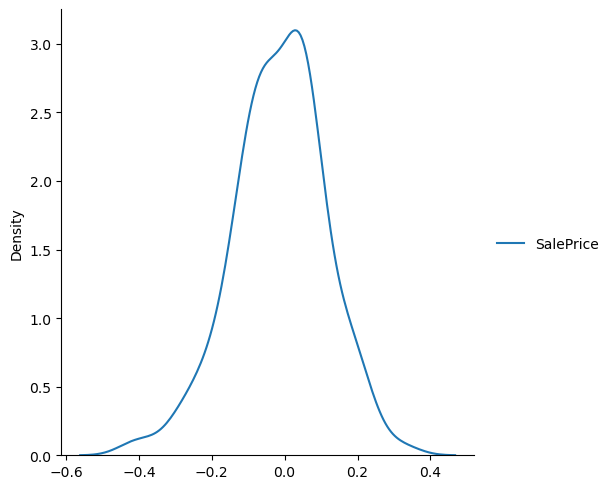

In [63]:
import seaborn as sns
sns.displot(reg_prediction-y_test,kind='kde')

In [64]:
from sklearn.metrics import  mean_squared_error, r2_score ,mean_absolute_error,mean_absolute_percentage_error

In [65]:
Adj_r2 = 1 - ((1-r2_score(y_test,reg_prediction)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
Adj_r2

0.8610582326569395

In [66]:
print("R square =",r2_score(y_test,reg_prediction))
print("Adjusted R.sq. =",Adj_r2)
print("Mean Squared Error =",mean_squared_error(y_test,reg_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,reg_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,reg_prediction))

R square = 0.8821390525296797
Adjusted R.sq. = 0.8610582326569395
Mean Squared Error = 0.01613896855381248
Mean Absolute Error = 0.09981171428209495
Mean Absolute % Error = 0.008296355699072


### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [68]:
ridge_prediction=ridge_reg.predict(X_test)
ridge_prediction

array([[12.26253134],
       [11.99423909],
       [11.69341901],
       [12.29248375],
       [11.42588944],
       [11.50778194],
       [12.4394656 ],
       [11.68621208],
       [13.07768231],
       [11.97567339],
       [12.29081474],
       [11.96408453],
       [12.25205903],
       [11.68975194],
       [11.7482749 ],
       [11.86255125],
       [12.40568021],
       [11.70457353],
       [11.80719907],
       [12.15356712],
       [11.70580389],
       [11.94697526],
       [11.49155938],
       [12.01256793],
       [12.12760783],
       [12.15234408],
       [12.07551174],
       [11.27772893],
       [12.49209357],
       [11.56525803],
       [11.92944446],
       [12.21609057],
       [11.95031241],
       [12.61286424],
       [12.66052582],
       [12.11783015],
       [12.55901026],
       [11.75726414],
       [12.36854878],
       [12.70969495],
       [12.32904649],
       [11.82230431],
       [12.24325637],
       [12.64129288],
       [12.72285738],
       [11

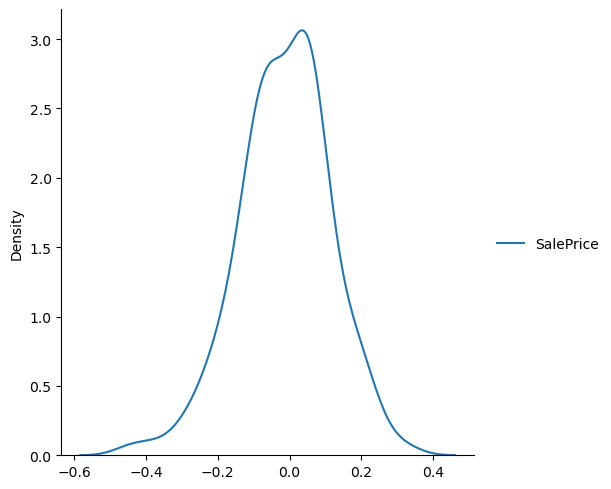

In [69]:
sns.displot(ridge_prediction-y_test,kind='kde')

In [70]:
print("R square =",r2_score(y_test,ridge_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,ridge_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,ridge_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,ridge_prediction))

R square = 0.8819233396314247
Mean Squared Error = 0.016168506613333578
Mean Absolute Error = 0.10036798630083833
Mean Absolute % Error = 0.008339309718228476


### Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [72]:
lasso_prediction=lasso_reg.predict(X_test)
lasso_prediction

array([12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02408061,
       12.02408061, 12.02408061, 12.02408061, 12.02408061, 12.02

In [73]:
lasso_prediction=lasso_prediction.reshape(146,1)
lasso_prediction

array([[12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12.02408061],
       [12

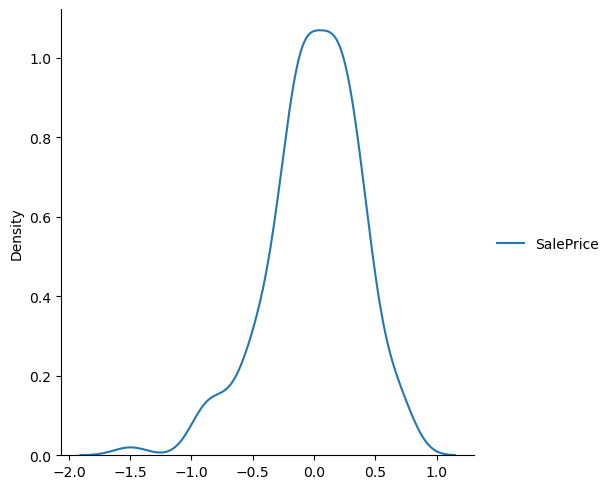

In [74]:
sns.displot(lasso_prediction-y_test,kind='kde')

In [75]:
print("R square =",r2_score(y_test,lasso_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,lasso_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,lasso_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,lasso_prediction))

R square = -6.443755369289761e-07
Mean Squared Error = 0.13693237072808298
Mean Absolute Error = 0.2859628150299317
Mean Absolute % Error = 0.023660363292900156


### KNeighborsRegressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knr_reg=KNeighborsRegressor()
knr_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
knr_predictions=knr_reg.predict(X_test)
knr_predictions

array([[11.77132872],
       [11.8922201 ],
       [11.72787995],
       [12.28098761],
       [11.50122433],
       [11.70912102],
       [12.25874738],
       [11.68659691],
       [12.97056181],
       [11.96014303],
       [12.23837823],
       [11.83370996],
       [12.31656331],
       [12.01156066],
       [11.79464459],
       [11.80561717],
       [12.42930589],
       [11.67293819],
       [11.79234112],
       [12.2430677 ],
       [11.76669549],
       [11.97587477],
       [11.52041243],
       [12.07918296],
       [12.13913862],
       [12.16033016],
       [12.00932561],
       [11.4816252 ],
       [12.57573023],
       [11.62775207],
       [11.7826908 ],
       [12.32598093],
       [12.12064713],
       [12.61063142],
       [12.82405169],
       [12.22140598],
       [12.63834224],
       [11.76817582],
       [12.32858899],
       [12.50877062],
       [12.25541275],
       [11.84783047],
       [12.25780319],
       [12.73139009],
       [12.70263825],
       [11

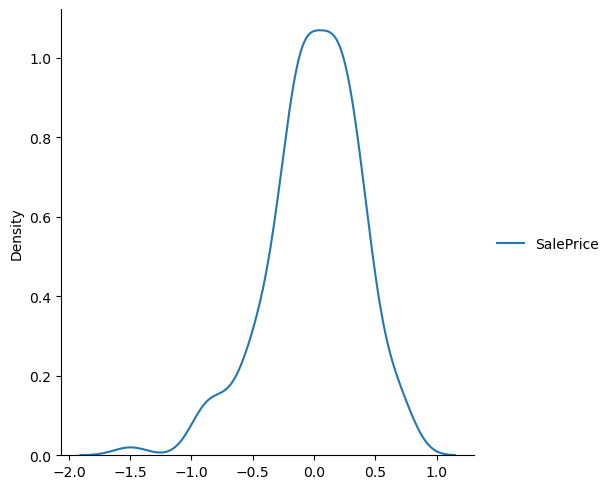

In [78]:
sns.displot(lasso_prediction-y_test,kind='kde')

In [79]:
print("R square =",r2_score(y_test,knr_predictions))
print("Mean Squared Error =",mean_squared_error(y_test,knr_predictions))
print("Mean Absolute Error =",mean_absolute_error(y_test,knr_predictions))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,knr_predictions))

R square = 0.7955386049490095
Mean Squared Error = 0.027997365505885826
Mean Absolute Error = 0.1291348891544982
Mean Absolute % Error = 0.01073140963168612


### DecisionTreeRegressor

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr_reg=DecisionTreeRegressor()
dtr_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
dtr_prediction=dtr_reg.predict(X_test).reshape(146,1)
dtr_prediction

array([[12.3883942 ],
       [11.56171563],
       [11.1331281 ],
       [12.24288662],
       [11.57119437],
       [10.93298196],
       [12.58819065],
       [11.74006104],
       [13.53447303],
       [11.92503512],
       [12.43153351],
       [12.24288662],
       [12.27839331],
       [12.04941884],
       [11.49577931],
       [11.7905572 ],
       [12.24288662],
       [11.62625415],
       [11.56076279],
       [12.04355372],
       [11.48760766],
       [11.91170158],
       [11.28978191],
       [12.08953883],
       [12.18075484],
       [12.27839331],
       [12.08390501],
       [11.30220443],
       [12.66032792],
       [11.81303006],
       [11.72803684],
       [12.10015642],
       [11.7829526 ],
       [12.72783821],
       [12.82098798],
       [11.99535161],
       [12.25247902],
       [11.91772368],
       [12.56723749],
       [12.6181823 ],
       [12.52441728],
       [11.8493977 ],
       [12.2067774 ],
       [12.66980666],
       [12.64432758],
       [11

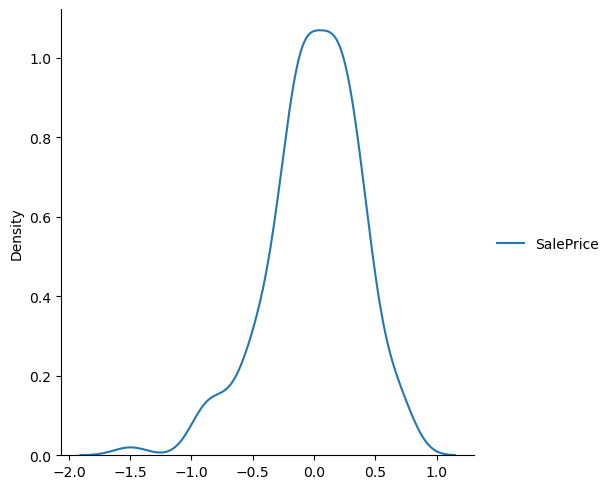

In [82]:
sns.displot(lasso_prediction-y_test,kind='kde')

In [83]:
print("R square =",r2_score(y_test,dtr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,dtr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,dtr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,dtr_prediction))

R square = 0.7774593876435315
Mean Squared Error = 0.03047299399719868
Mean Absolute Error = 0.1298752856608587
Mean Absolute % Error = 0.010824379036515753


### ExtraTreesRegressor

In [84]:
from sklearn.ensemble import ExtraTreesRegressor
etr_reg=ExtraTreesRegressor()
etr_reg.fit(X_train,y_train)

etr_prediction=etr_reg.predict(X_test).reshape(146,1)
etr_prediction

C:\Users\Rohit\AppData\Local\Temp\ipykernel_12276\1183064588.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr_reg.fit(X_train,y_train)


array([[12.29870931],
       [11.92552662],
       [11.73329911],
       [12.29601718],
       [11.48845835],
       [11.55041003],
       [12.43986113],
       [11.76062839],
       [13.27715379],
       [11.93035376],
       [12.33467682],
       [11.86145407],
       [12.26719411],
       [11.71797637],
       [11.76841314],
       [11.80121517],
       [12.42682201],
       [11.71634856],
       [11.81482743],
       [12.09043406],
       [11.7788949 ],
       [11.84375235],
       [11.44332703],
       [12.06873749],
       [12.15671659],
       [12.17631602],
       [12.06158382],
       [11.27107225],
       [12.52551143],
       [11.66037108],
       [11.84810864],
       [12.27491502],
       [11.90022041],
       [12.6520668 ],
       [12.54648825],
       [12.1235771 ],
       [12.63210757],
       [11.82730197],
       [12.39612509],
       [12.65103531],
       [12.3065885 ],
       [11.90475833],
       [12.19194435],
       [12.64168876],
       [12.80747807],
       [11

In [85]:
print("R square =",r2_score(y_test,etr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,etr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,etr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,etr_prediction))

R square = 0.8861475967380309
Mean Squared Error = 0.01559006944589179
Mean Absolute Error = 0.09433978020361744
Mean Absolute % Error = 0.007832564572679692


### AdaBoostRegressor

In [86]:
from sklearn.ensemble import AdaBoostRegressor
abr_reg=AdaBoostRegressor()
abr_reg.fit(X_train,y_train)

abr_prediction=abr_reg.predict(X_test).reshape(146,1)
abr_prediction

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[12.25541935],
       [11.96681005],
       [11.51156501],
       [12.3517828 ],
       [11.56667361],
       [11.46203954],
       [12.38965483],
       [11.72894003],
       [13.00130333],
       [11.962021  ],
       [12.07752478],
       [11.95545138],
       [12.30792946],
       [11.65713615],
       [11.69931044],
       [11.65713615],
       [12.39882648],
       [11.775449  ],
       [11.65713615],
       [12.20682517],
       [11.62151862],
       [11.98172607],
       [11.41620952],
       [12.0073414 ],
       [12.07678612],
       [12.08627528],
       [12.04753342],
       [11.40063146],
       [12.44133338],
       [11.55348909],
       [11.88618506],
       [12.25541935],
       [11.78646508],
       [12.57898556],
       [12.6901013 ],
       [12.14484471],
       [12.61410287],
       [11.69582524],
       [12.39880842],
       [12.60338386],
       [12.24263738],
       [11.6815564 ],
       [12.01237571],
       [12.57932773],
       [12.84933916],
       [11

In [87]:
print("R square =",r2_score(y_test,abr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,abr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,abr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,abr_prediction))

R square = 0.8054291802658334
Mean Squared Error = 0.02664302645259142
Mean Absolute Error = 0.1268116147613788
Mean Absolute % Error = 0.01054940172665655


### GradientBoostingRegressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg=GradientBoostingRegressor()
gbr_reg.fit(X_train,y_train)

gbr_prediction=gbr_reg.predict(X_test).reshape(146,1)
gbr_prediction

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[12.27738013],
       [11.97808238],
       [11.68259517],
       [12.27768044],
       [11.44914059],
       [11.49259234],
       [12.41480235],
       [11.75399144],
       [13.11448836],
       [11.92459825],
       [12.18712572],
       [12.01319406],
       [12.3096588 ],
       [11.74804823],
       [11.78768742],
       [11.89328639],
       [12.42066218],
       [11.80944363],
       [11.87115997],
       [12.19144606],
       [11.67715225],
       [11.93601843],
       [11.47342968],
       [12.02415465],
       [12.15182986],
       [12.09709976],
       [12.03866673],
       [11.28456636],
       [12.54891546],
       [11.62708381],
       [11.88395182],
       [12.17545075],
       [11.85919333],
       [12.61193481],
       [12.72782841],
       [12.08957484],
       [12.53148442],
       [11.79653847],
       [12.38127571],
       [12.7303739 ],
       [12.17873488],
       [11.86458286],
       [12.1426566 ],
       [12.65662933],
       [12.77390665],
       [11

In [89]:
print("R square =",r2_score(y_test,gbr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,gbr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,gbr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,gbr_prediction))

R square = 0.8703818693509993
Mean Squared Error = 0.017748906482148923
Mean Absolute Error = 0.10160494438548327
Mean Absolute % Error = 0.008456142542204066


### SVR

In [90]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(X_train,y_train)

svr_prediction=svr_reg.predict(X_test).reshape(146,1)
svr_prediction

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[12.10540751],
       [12.0057851 ],
       [11.60480926],
       [12.24030477],
       [11.45454821],
       [11.55086981],
       [12.37111893],
       [11.72673374],
       [12.90262729],
       [11.91813729],
       [12.19006311],
       [11.94037327],
       [12.28720064],
       [11.72561699],
       [11.7418379 ],
       [11.85704775],
       [12.3900317 ],
       [11.72591007],
       [11.76616299],
       [12.13890372],
       [11.71081082],
       [11.99166474],
       [11.35584153],
       [11.99827665],
       [12.13575956],
       [12.21962247],
       [11.99810661],
       [11.31083071],
       [12.39518957],
       [11.5586998 ],
       [11.81594318],
       [12.24400535],
       [11.90518107],
       [12.64292696],
       [12.77323134],
       [12.0820264 ],
       [12.59324448],
       [11.79282418],
       [12.37553714],
       [12.79024996],
       [12.33773888],
       [11.78489201],
       [12.16432813],
       [12.67484166],
       [12.76918572],
       [11

In [91]:
print("R square =",r2_score(y_test,svr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,svr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,svr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,svr_prediction))

R square = 0.8741395668511962
Mean Squared Error = 0.017234356386531452
Mean Absolute Error = 0.09811057345501226
Mean Absolute % Error = 0.008127681241696182


### RandomForestRegressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr_reg=RandomForestRegressor()
rfr_reg.fit(X_train,y_train)

rfr_prediction=rfr_reg.predict(X_test).reshape(146,1)
rfr_prediction

C:\Users\Rohit\AppData\Local\Temp\ipykernel_12276\1880211728.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_reg.fit(X_train,y_train)


array([[12.30382753],
       [11.8527779 ],
       [11.57589777],
       [12.36034242],
       [11.43611423],
       [11.48619749],
       [12.3525223 ],
       [11.73962127],
       [13.28259921],
       [11.9265731 ],
       [12.32751272],
       [12.02334783],
       [12.31086113],
       [11.78524383],
       [11.74169771],
       [11.87492034],
       [12.41431184],
       [11.71910423],
       [11.82080587],
       [12.10864936],
       [11.75899727],
       [11.86149774],
       [11.4643294 ],
       [12.0853208 ],
       [12.15015913],
       [12.10407378],
       [12.058458  ],
       [11.27493084],
       [12.67628861],
       [11.70495596],
       [11.83804364],
       [12.2310424 ],
       [11.85491902],
       [12.60704354],
       [12.68676602],
       [12.06877304],
       [12.56056048],
       [11.85082256],
       [12.39704982],
       [12.63274   ],
       [12.24355094],
       [11.88070109],
       [12.17757748],
       [12.64245495],
       [12.75833099],
       [11

In [93]:
print("R square =",r2_score(y_test,rfr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,rfr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,rfr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,rfr_prediction))

R square = 0.8928183421720068
Mean Squared Error = 0.014676629047692574
Mean Absolute Error = 0.09032590463018048
Mean Absolute % Error = 0.007497730523752555


In [94]:
print("LINEAR REGRESSION")
print("R square =",r2_score(y_test,reg_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,reg_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,reg_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,reg_prediction))

print("\nRIDGE REGRESSION")
print("R square =",r2_score(y_test,ridge_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,ridge_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,ridge_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,ridge_prediction))

print("\nLASSO REGRESSION")
print("R square =",r2_score(y_test,lasso_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,lasso_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,lasso_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,lasso_prediction))

print("\nKNEIGHBORS REGRESSOR")
print("R square =",r2_score(y_test,knr_predictions))
print("Mean Squared Error =",mean_squared_error(y_test,knr_predictions))
print("Mean Absolute Error =",mean_absolute_error(y_test,knr_predictions))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,knr_predictions))

print("\nDECISION TREE REGRESSOR")
print("R square =",r2_score(y_test,dtr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,dtr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,dtr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,dtr_prediction))

print("\nEXTRA TREE REGRESSOR")
print("R square =",r2_score(y_test,etr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,etr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,etr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,etr_prediction))

print("\nADABOOST REGRESSOR")
print("R square =",r2_score(y_test,abr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,abr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,abr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,abr_prediction))

print("\nGRADIENT BOOSTING REGRESSOR")
print("R square =",r2_score(y_test,gbr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,gbr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,gbr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,gbr_prediction))

print("\nSUPPORT VECTOR REGRESSOR")
print("R square =",r2_score(y_test,svr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,svr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,svr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,svr_prediction))

print("\nRANDOM FOREST REGRESSOR")
print("R square =",r2_score(y_test,rfr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,rfr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,rfr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,rfr_prediction))

LINEAR REGRESSION
R square = 0.8821390525296797
Mean Squared Error = 0.01613896855381248
Mean Absolute Error = 0.09981171428209495
Mean Absolute % Error = 0.008296355699072

RIDGE REGRESSION
R square = 0.8819233396314247
Mean Squared Error = 0.016168506613333578
Mean Absolute Error = 0.10036798630083833
Mean Absolute % Error = 0.008339309718228476

LASSO REGRESSION
R square = -6.443755369289761e-07
Mean Squared Error = 0.13693237072808298
Mean Absolute Error = 0.2859628150299317
Mean Absolute % Error = 0.023660363292900156

KNEIGHBORS REGRESSOR
R square = 0.7955386049490095
Mean Squared Error = 0.027997365505885826
Mean Absolute Error = 0.1291348891544982
Mean Absolute % Error = 0.01073140963168612

DECISION TREE REGRESSOR
R square = 0.7774593876435315
Mean Squared Error = 0.03047299399719868
Mean Absolute Error = 0.1298752856608587
Mean Absolute % Error = 0.010824379036515753

EXTRA TREE REGRESSOR
R square = 0.8861475967380309
Mean Squared Error = 0.01559006944589179
Mean Absolute Err

**As we can see Random Forest Regressor Model is giving the best result of this dataset but we will tune it to get the more optimize result if possible.**

## Hyper Parameter Tunnig

### Randomized SearchCV

In [107]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [108]:
rfr_reg=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rfr_reg,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [110]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1000}

In [111]:
## Random Forest Regressor with hyper parameter tuning
rfr_reg=RandomForestRegressor(n_estimators=800,max_depth=1000,min_samples_split=2,min_samples_leaf=1,max_features='log2')
rfr_reg.fit(X_train,y_train)

rfr_prediction=rfr_reg.predict(X_test).reshape(146,1)
rfr_prediction

C:\Users\Rohit\AppData\Local\Temp\ipykernel_12276\3215548355.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_reg.fit(X_train,y_train)


array([[12.25223387],
       [11.89983457],
       [11.70945012],
       [12.27931911],
       [11.45404385],
       [11.55467955],
       [12.33851149],
       [11.74352468],
       [13.12249025],
       [11.93713319],
       [12.27978114],
       [11.89544273],
       [12.30357726],
       [11.76601388],
       [11.7607761 ],
       [11.82271694],
       [12.41281671],
       [11.70261066],
       [11.85408656],
       [12.10490624],
       [11.69217334],
       [11.90484845],
       [11.55538873],
       [12.08026854],
       [12.1452398 ],
       [12.12652421],
       [12.04979493],
       [11.28900862],
       [12.54111195],
       [11.66374533],
       [11.85756144],
       [12.23911505],
       [11.88464528],
       [12.59205145],
       [12.71442775],
       [12.12042738],
       [12.57495416],
       [11.78961977],
       [12.37142058],
       [12.6434571 ],
       [12.26045747],
       [11.88774823],
       [12.16294644],
       [12.63953981],
       [12.72282418],
       [11

In [112]:
print("\nRANDOM FOREST REGRESSOR")
print("R square =",r2_score(y_test,rfr_prediction))
print("Mean Squared Error =",mean_squared_error(y_test,rfr_prediction))
print("Mean Absolute Error =",mean_absolute_error(y_test,rfr_prediction))
print("Mean Absolute % Error =",mean_absolute_percentage_error(y_test,rfr_prediction))


RANDOM FOREST REGRESSOR
R square = 0.8947602541707907
Mean Squared Error = 0.014410718605299973
Mean Absolute Error = 0.08830073853770258
Mean Absolute % Error = 0.007321441456825083


Hyperparameter tuning can be very advantageous to improve the accuracy of machine learning models. In our case, the random forest model is already good, so there was not much improvement in accuracy with hyperparameter tuning methods.